Задача:
* проанализировать работу цветочного магазина за данный отчетный период
* предоставлены живые данные



## Загрузка и предобработка

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
# import re
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D://T_processed_csv.csv", parse_dates=['Дата доставки', 'Дата и время'])
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)

df['month'] = df['Дата доставки'].dt.month
df['year'] = df['Дата доставки'].dt.year
# df['ym'] = df.year.astype('str') + ' ' + df.month.astype('str')
df = df.rename(columns = {'Адрес доставки':'address', 'Покупатель':'client_name', 'Контактный телефон':'phone', 'Сумма':'price', 'Дата доставки':'delivery_date', 'Время доставки':'delivery_time','Номер':'code', 'Оплата':'payment_status', 'E-mail':'email', 'Дата и время':'date_and_time', 'Комментарий клиента':'client_comment', 'Тип оплаты':'payment_type'})
df.head(2)

,Unnamed: 0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year
0,0,"229292, москва город, г. москва, мосфильмовска...",гоша клиент т,9964568777,500,2020-06-03,в 14:00,329c,NaN,NaN,2020-05-03 17:43:00,белый с зеленым букет 4500,NaN,6.0,2020.0
1,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,9574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8.0,2020.0


In [4]:
df_report_moment = df.query('delivery_date < "2022-06-27"').query('year.notna()', engine='python')
df_report_moment.phone = df_report_moment.phone.astype(str).str.replace(' ','').str.replace('-','').str.replace('+','').str[1:]
df_report_moment.shape

(28719, 15)

In [5]:
dfs_dict = {'df':df}
for name_, df_ in dfs_dict.items():
    print('='*60)
    print('\033[1m'+f'    INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('='*60)
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates(inplace=True)
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('='*60)
    df_.columns = df_.columns.str.lower().str.replace(' ', '_')
    print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
    print('='*60)
    print('\033[1m'+f'Nulls and notNAs in {name_}:'+'\033[0m\n')
    missing_data = pd.DataFrame({'nulls':df_.isna().sum()})
    missing_data['null_rate'] = df_.isna().mean().map(lambda x: '{:.2%}'.format(x))
    missing_data['notna'] = df_.notna().sum()
    missing_data['notna_rate'] = df_.notna().mean().map(lambda x: '{:.2%}'.format(x))
    
    display(missing_data)
    
    print('='*60)
    print('\033[1m'+f'Number of properties in {name_}:'+'\033[0m\n', len(df_.columns))
    print('='*60)
    display(df_.head(3))
    print('='*60)

    INFO df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30507 entries, 0 to 30506
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      30507 non-null  int64         
 1   address         29723 non-null  object        
 2   client_name     30507 non-null  object        
 3   phone           30506 non-null  object        
 4   price           30507 non-null  int64         
 5   delivery_date   30394 non-null  datetime64[ns]
 6   delivery_time   27845 non-null  object        
 7   code            30507 non-null  object        
 8   payment_status  28167 non-null  object        
 9   email           2 non-null      object        
 10  date_and_time   30507 non-null  datetime64[ns]
 11  client_comment  30437 non-null  object        
 12  payment_type    28438 non-null  object        
 13  month           30394 non-null  float64       
 14  year            30394 non-null  float64  

,nulls,null_rate,notna,notna_rate
unnamed:_0,0,0.00%,30507,100.00%
address,784,2.57%,29723,97.43%
client_name,0,0.00%,30507,100.00%
phone,1,0.00%,30506,100.00%
price,0,0.00%,30507,100.00%
delivery_date,113,0.37%,30394,99.63%
delivery_time,2662,8.73%,27845,91.27%
code,0,0.00%,30507,100.00%
payment_status,2340,7.67%,28167,92.33%
email,30505,99.99%,2,0.01%


Number of properties in df:
 15


,unnamed:_0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year
0,0,"229292, москва город, г. москва, мосфильмовска...",гоша клиент т,9964568777,500,2020-06-03,в 14:00,329c,NaN,NaN,2020-05-03 17:43:00,белый с зеленым букет 4500,NaN,6.0,2020.0
1,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,9574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8.0,2020.0
2,2,самовывоз,эдуард клиент т,9987788577,0,2020-09-03,в 13:00,463c,NaN,NaN,2020-09-03 10:50:00,букет пышный для мамы весеннее 10тыс,NaN,9.0,2020.0


### **Вывод**:
* отчетный период - до 2022-06-27
* заменены названия столбцов
* дубликаты отсутствуют

## Распределение заказов по цене, гистограмма

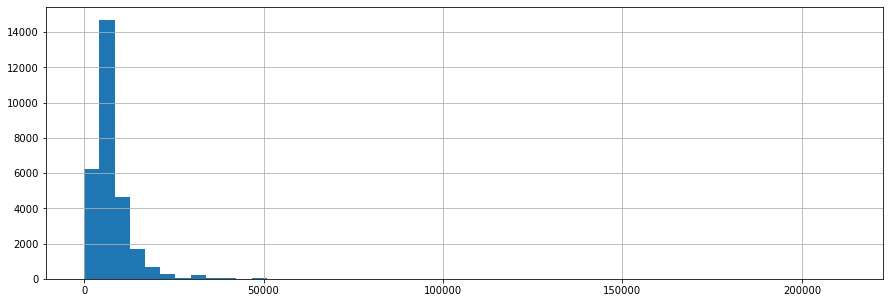

In [7]:
df_report_moment.price.hist(figsize = (15,5), bins=50)
plt.show()

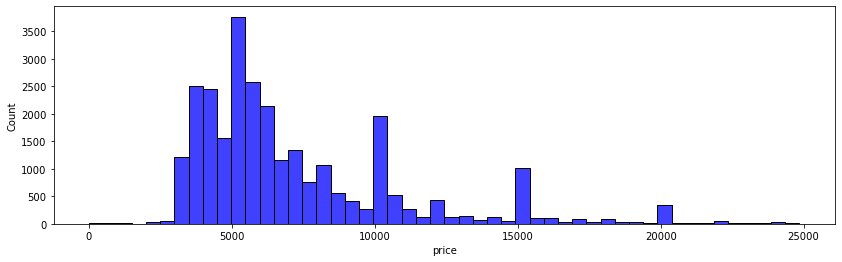

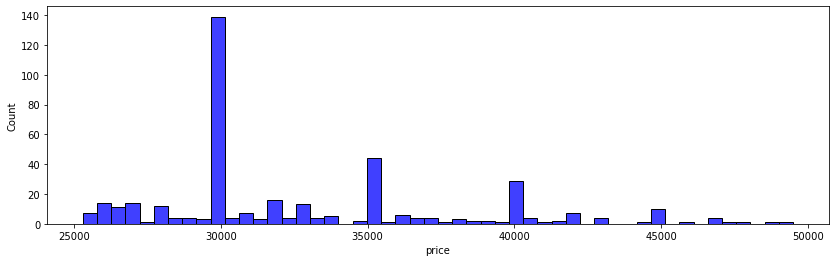

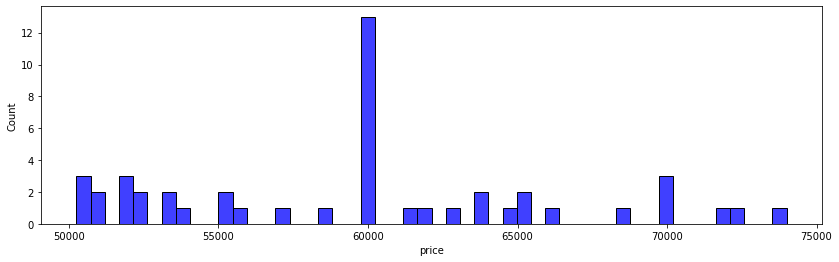

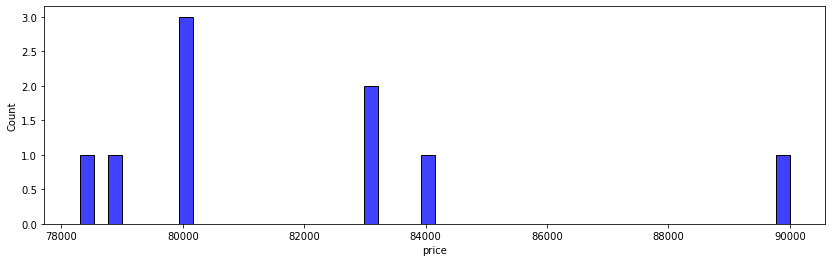

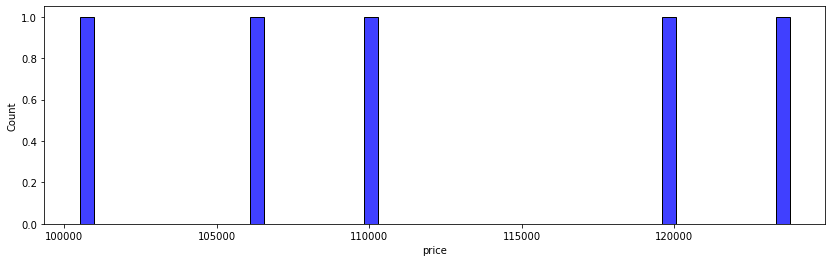

<Figure size 1008x288 with 0 Axes>

In [8]:
slices = [0, 25000, 50000, 75000, 100000, 125000]
for i in range(len(slices)):
    fig = plt.figure(figsize=(14,4))
    if (i + 1) < len(slices):
        sns.histplot(df_report_moment.query(f'{slices[i]} < price < {slices[i + 1]}').price, bins=50, color="Blue")
    plt.show

In [9]:
print(df_report_moment.price.quantile(.05).astype(int))
print(df_report_moment.price.quantile(.99).astype(int))

3290
32000


In [10]:
df_report_moment.price.to_frame().sort_values('price').query('price == 0').price.count()

239

In [11]:
df_report_moment = df_report_moment.query(f'{df_report_moment.price.quantile(.05).astype(int)} <= price <= {df_report_moment.price.quantile(.95).astype(int)}', engine='python')
df_report_moment = df_report_moment.reset_index().drop('index', axis=1)
df_report_moment.shape

(25850, 15)

In [12]:
df_report_moment.address = df_report_moment.address.astype(str)

### **Вывод**:
* Основная доля заказов сосредоточена в пределах 3.000-15.000р
* Также имеются редкие разовые заказы ценой 30.000 и более 
* Заказы ценой в 50.000 и более являются скорее сомнительными, что может быть проверено с помощью сверки фискальной отчетности

## Распределение заказов по станциям

In [13]:
metro_list = [
    
"Авиамоторная",
"Академическая",
"Александровскийсад",
"Алексеевская",
"Алма-Атинская",
"Алтуфьево",
"Аминьевская",
"Андроновка",
"Аникеевка",
"Аннино",
"Арбатская",
"Аэропорт",
"Аминьевскоешоссе",
"Багратионовская",
"Баковка",
"Балтийская",
"Баррикадная",
"Бауманская",
"Беговая",
"Белокаменная",
"Беломорская",
"Белорусская",
"Беляево",
"Бескудниково",
"Бибирево",
"БиблиотекаимениЛенина",
"Битца",
"Битцевскийпарк",
"Борисово",
"Боровицкая",
"Боровскоешоссе",
"Ботаническийсад",
"Братиславская",
"БульварадмиралаУшакова",
"БульварДмитрияДонского",
"БунинскаяАллея",
"Бутово",
"Бутырская",
"Беломорскаяулица",
"Бутырская",
"ВДНХ",
"ВерхниеКотлы",
"ВерхниеЛихоборы",
"Владыкино",
"Водники",
"Водныйстадион",
"Войковская",
"Волгоградскийпроспект",
"Волжская",
"Волоколамская",
"Воробьевыгоры",
"Воронцовская",
"Выставочная",
"Выставочныйцентр",
"Выхино",
"Волхонка",
"Воронцовская",
"Гражданская",
"Дегунино",
"Деловойцентр",
"Депо",
"Динамо",
"Дмитровская",
"Добрынинская",
"Долгопрудная",
"Домодедовская",
"Достоевская",
"Дубровка",
"Давыдково",
"Дорогомиловская",
"Зорге",
"Зюзино",
"Зябликово",
"Измайловская",
"Калитники",
"Калужская",
"Кантемировская",
"Каховская",
"Каширская",
"Киевская",
"Китай-город",
"Кожуховская",
"Коломенская",
"Коммунарка",
"Комсомольская",
"Коньково",
"Коптево",
"Косино",
"Котельники",
"Красногвардейская",
"Красногорская",
"Краснопресненская",
"Красносельская",
"Красныеворота",
"КрасныйБалтиец",
"КрасныйСтроитель",
"Крестьянскаязастава",
"Кропоткинская",
"Крылатское",
"Крымская",
"Кузнецкиймост",
"Кузьминки",
"Кунцевская",
"Курская",
"Курьяново",
"Кутузовская",
"Каховская",
"Каширская",
"Кленовыйбульвар",
"Кунцевская",
"Лермонтовскийпроспект",
"Лесопарковая",
"Лефортово",
"Лианозово",
"Лихоборы",
"Лобня",
"Локомотив",
"Ломоносовскийпроспект",
"Лубянка",
"Лужники",
"Лухмановская",
"Люблино",
"Марксистская",
"Марьинароща",
"Марьино",
"Маяковская",
"Медведково",
"Международная",
"Менделеевская",
"Минская",
"Митино",
"Мичуринскийпроспект",
"Мнёвники",
"Молодежная",
"Москва-Товарная",
"Москворечье",
"Мякинино",
"Нагорная",
"НародноеОполчение",
"Нахабино",
"НахимовскийПроспект",
"Некрасовка",
"Немчиновка",
"Нижегородская",
"Новаторская",
"Новогиреево",
"Новодачная",
"Новокосино",
"Новокузнецкая",
"Новопеределкино",
"Новослободская",
"Новохохловская",
"Новоясеневская",
"НовыеЧерёмушки",
"НижниеМневники",
"Озёрная",
"Окружная",
"Окская",
"Октябрьская",
"Октябрьскоеполе",
"Ольховая",
"Опалиха",
"Орехово",
"Остафьево",
"Отрадное",
"Охотныйряд",
"Павелецкая",
"Павшино",
"Панфиловская",
"ПаркКультуры",
"ПаркПобеды",
"Партизанская",
"Пенягино",
"Первомайская",
"Перерва",
"Перово",
"ПетровскийпаркЗакрыта",
"Петровско-Разумовская",
"Печатники",
"Пионерская",
"Планерная",
"ПлощадьГагарина",
"ПлощадьИльича",
"ПлощадьРеволюции",
"Подольск",
"Покровское",
"Полежаевская",
"Полянка",
"Пражская",
"Преображенскаяплощадь",
"Прокшино",
"Пролетарская",
"ПроспектВернадского",
"ПроспектМира",
"Профсоюзная",
"Пушкинская",
"Пятницкоешоссе",
"Петровскийпарк",
"Петровско-Разумовская",
"Печатники",
"Плющиха",
"ПроспектВернадского",
"Раменки",
"Рассказовка",
"Речнойвокзал",
"Рижская",
"Римская",
"Ростокино",
"Румянцево",
"Рязанскийпроспект",
"Ржевская",
"Рубцовская",
"Савеловская",
"Саларьево",
"Свиблово",
"Севастопольская",
"Селигерская",
"Семеновская",
"Серпуховская",
"Сетунь",
"Силикатная",
"Сколково",
"Славянскийбульвар",
"Смоленская",
"Сокол",
"СоколинаяГора",
"Сокольники",
"Солнцево",
"Спартак",
"Спортивная",
"Сретенскийбульвар",
"Стахановская",
"Стрешнево",
"Стрешнево",
"Строгино",
"Студенческая",
"Сухаревская",
"Сходненская",
"Севастопольскийпроспект",
"Стромынка",
"Тверская",
"Театральная",
"Текстильщики",
"Телецентр",
"Теплыйстан",
"Терехово",
"Тестовская",
"Технопарк",
"Тимирязевская",
"Третьяковская",
"Трикотажная",
"Тропарёво",
"Трубная",
"Тульская",
"Тургеневская",
"Тушинская",
"Текстильщики",
"Терехово",
"Улица1905года",
"УлицаАкадемикаКоролёва",
"УлицаакадемикаЯнгеля",
"УлицаГорчакова",
"УлицаДмитриевского",
"УлицаМилашенкова",
"УлицаСергеяЭйзенштейна",
"УлицаСкобелевская",
"УлицаСтарокачаловская",
"Университет",
"УлицаНародногоополчения",
"УлицаНоваторов",
"Филевскийпарк",
"Фили (Филевскаялиния)",
"Фонвизинская",
"Фрунзенская",
"Фонвизинская",
"Ховрино",
"Хорошёво",
"Хорошёвская",
"Царицыно",
"Цветнойбульвар",
"ЦСКА",
"Чертановская",
"Чеховская",
"Чистыепруды",
"Чкаловская",
"Шелепиха",
"Шереметьевская",
"Шипиловская",
"ШоссеЭнтузиастов",
"Шереметьевская",
"Щербинка",
"Щукинская",
"Электрозаводская",
"Юго-Западная",
"Южная"

]

In [14]:
metro_list = [x.lower() for x in metro_list]

In [15]:
len(metro_list)

295

In [16]:
# for metro in metro_list:
#     for i in range(len(df_report_moment)):
#         if metro in df_report_moment.at[i, 'address']:
#             df_report_moment.at[i, 'metro'] = metro

In [17]:
df_report_moment.head(2)

,Unnamed: 0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year
0,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8.0,2020.0
1,3,самовывоз,наталья партнёрство,889989498,10000,2020-03-21,в 14:00,654c,NaN,NaN,2020-03-21 11:55:00,букет розово малиновый,NaN,3.0,2020.0


In [18]:
# for i in metro_list:
#     df_report_moment.loc[df_report_moment.address.str.contains(i), 'metro'] = i

In [19]:
def metro_input(column):
    for i in metro_list:
        if i in column:
            return i
        

In [20]:
df_report_moment['metro'] = df_report_moment.address.apply(metro_input)

In [21]:
df_report_moment.query('metro.isna()', engine='python').address.to_frame()

,address
1,самовывоз
2,"224622, москва город, г. москва, ул. трехгорны..."
3,"москва город, г. москва, ул. адмирала макарова..."
4,"московская область, с. ангелово, жилой комплек..."
5,"267678, москва город, г. москва, пр-кт. академ..."
...,...
25838,ул академика анохина 7 подъезд 2 этаж 8 кв 42 ...
25840,ул. петровка дом 2. \r\nцум 2 этаж
25846,"покровка д 27, ресторан extra virgin"
25847,"229284, москва город, г. москва, ул. пырьева, ..."


In [22]:
df_report_moment.head()

,Unnamed: 0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year,metro
0,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8.0,2020.0,бибирево
1,3,самовывоз,наталья партнёрство,889989498,10000,2020-03-21,в 14:00,654c,NaN,NaN,2020-03-21 11:55:00,букет розово малиновый,NaN,3.0,2020.0,None
2,4,"224622, москва город, г. москва, ул. трехгорны...",анаид клиент т,585557777,5400,2020-03-26,в 10:00,681c,оплачен полностью,NaN,2020-03-24 11:34:00,"букет на 5000 одноголовая роза россия,эустома,...",оплата по счету,3.0,2020.0,None
3,5,"москва город, г. москва, ул. адмирала макарова...",роман клиент т,568569755,6000,2020-03-25,с 13:00 до 14:00,696c,оплачен полностью,NaN,2020-03-25 10:40:00,коробка барбадос гортензии и эустома,перевод на карту тинькофф,3.0,2020.0,None
4,6,"московская область, с. ангелово, жилой комплек...",зина клиент т,988799558,9000,2020-03-25,с 12:00 до 20:00,697c,оплачен полностью,NaN,2020-03-25 10:42:00,коробка на усмотрение на 8000,оплата по счету,3.0,2020.0,None


In [23]:
df_cwm = df_report_moment.query('metro != "metro_unknown"')  # cwm - cleared by date with metro
df_pcwm = df_cwm[['price', 'metro']]                        # pcwm - cleared by date with metro, only price and metro
display(df_pcwm.head())
df_pcwm.shape

,price,metro
0,4100,бибирево
1,10000,None
2,5400,None
3,6000,None
4,9000,None


(25850, 2)

In [26]:
price_metro = df_pcwm.groupby('metro').agg({'price':'median', 'metro':'count'})\
        .rename(columns = {'price':'price_median', 'metro':'count_of_orders'})\
        .reset_index()
price_metro

,metro,price_median,count_of_orders
0,авиамоторная,5775.0,32
1,академическая,5500.0,142
2,алексеевская,6000.0,44
3,алма-атинская,5000.0,14
4,алтуфьево,5350.0,34
5,аминьевская,6000.0,13
6,аннино,5000.0,26
7,арбатская,5800.0,182
8,аэропорт,5600.0,89
9,багратионовская,5550.0,50


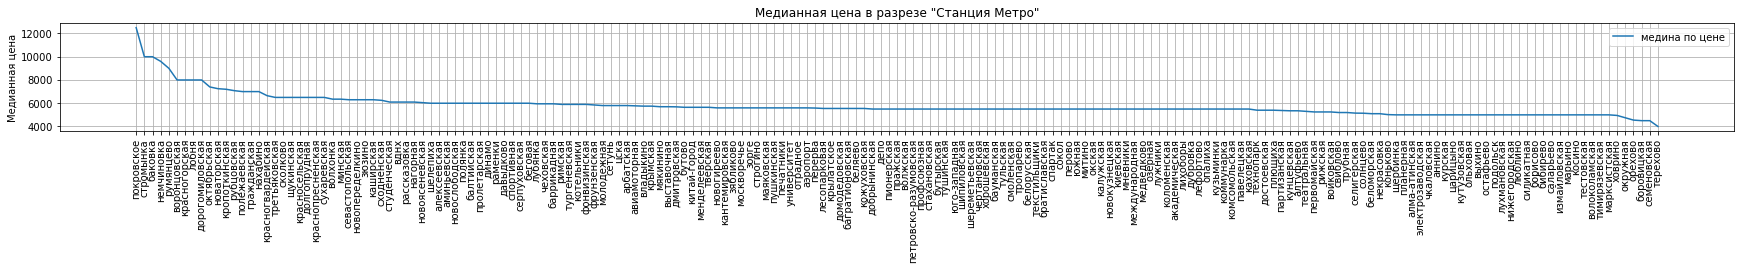

In [27]:
    plt.rcParams.update({'font.size': 10})
    plt.rcParams["figure.figsize"] = (30, 2)
    plt.plot(price_metro.sort_values('price_median', ascending=False).metro, price_metro.sort_values('price_median', ascending=False).price_median, label=f'медина по цене')
    plt.xticks(rotation=90) 
    plt.ylabel('Медианная цена')
    plt.title(f'Медианная цена в разрезе "Станция Метро"')
    plt.legend()
    plt.grid()
    plt.savefig(f'Медианная цена в разрезе {"Станция Метро"}.pdf', dpi=200, bbox_inches='tight')

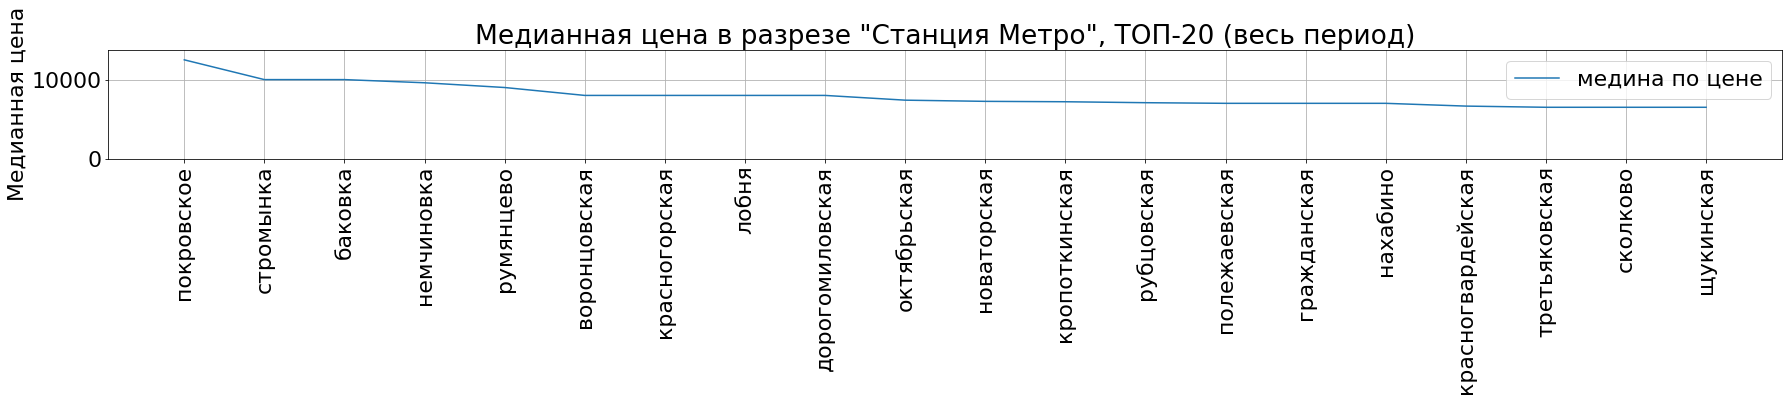

In [28]:
    plt.rcParams.update({'font.size': 22})
    plt.rcParams["figure.figsize"] = (30, 2)
    plt.plot(price_metro.sort_values('price_median', ascending=False).metro.head(20), price_metro.sort_values('price_median', ascending=False).price_median.head(20), label=f'медина по цене')
    plt.xticks(rotation=90) 
    plt.ylim(0, price_metro.sort_values('price_median', ascending=False).price_median.head(20).max()*1.1)
    plt.ylabel('Медианная цена')
    plt.title(f'Медианная цена в разрезе "Станция Метро", ТОП-20 (весь период)')
    plt.legend()
    plt.grid()
    plt.savefig(f'Медианная цена в разрезе {"Станция Метро"}, ТОП-20.pdf', dpi=200, bbox_inches='tight')

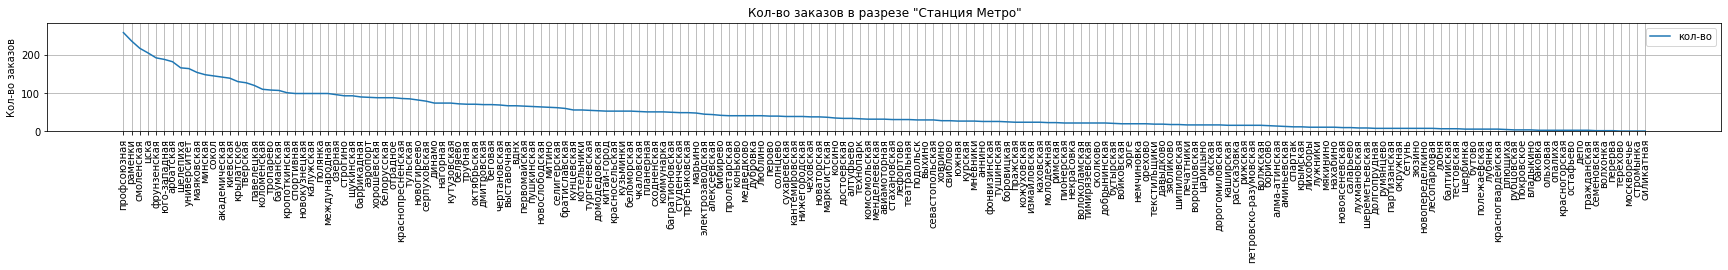

In [29]:
    plt.rcParams.update({'font.size': 10})
    plt.rcParams["figure.figsize"] = (30, 2)
    plt.plot(price_metro.sort_values('count_of_orders', ascending=False).metro, price_metro.sort_values('count_of_orders', ascending=False).count_of_orders, label=f'кол-во')
    plt.xticks(rotation=90) 
    plt.ylim(0, price_metro.sort_values('count_of_orders', ascending=False).count_of_orders.max()*1.1)
    plt.ylabel('Кол-во заказов')
    plt.title(f'Кол-во заказов в разрезе "Станция Метро"')
    plt.legend()
    plt.grid()
    plt.savefig(f'Кол-во заказов в разрезе {"Станция Метро"}.pdf', dpi=200, bbox_inches='tight')

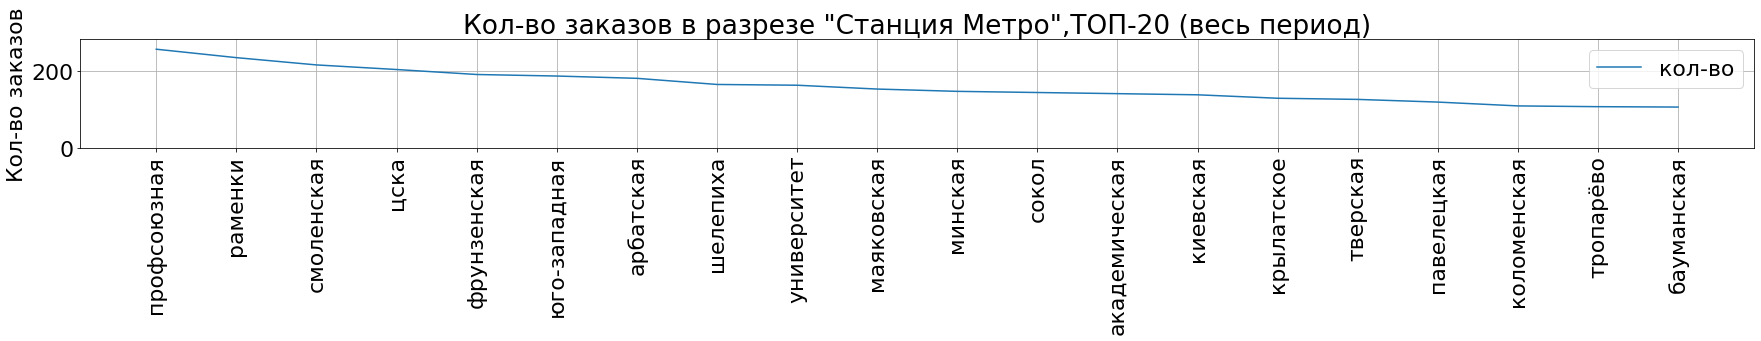

In [30]:
    plt.rcParams.update({'font.size': 22})
    plt.rcParams["figure.figsize"] = (30, 2)
    plt.plot(price_metro.sort_values('count_of_orders', ascending=False).head(20).metro, price_metro.sort_values('count_of_orders', ascending=False).head(20).count_of_orders, label=f'кол-во')
    plt.xticks(rotation=90) 
    plt.ylim(0, price_metro.sort_values('count_of_orders', ascending=False).count_of_orders.max()*1.1)
    plt.ylabel('Кол-во заказов')
    plt.title(f'Кол-во заказов в разрезе "Станция Метро",ТОП-20 (весь период)')
    plt.legend()
    plt.grid()
    plt.savefig(f'Кол-во заказов в разрезе {"Станция Метро"}, ТОП-20.pdf', dpi=200, bbox_inches='tight')

In [31]:
group_median_count = df_report_moment.groupby(['year','month'], as_index=False)\
    .agg({'price':'median','phone':'count'}).rename(columns={'price':'median_price', 'phone':'order_count'})
group_median_count[['year', 'month']] = group_median_count[['year', 'month']].astype(int)
group_median_count['date_m'] = group_median_count.year.astype(str) + ' ' + group_median_count.month.astype(str)
group_median_count.head()

,year,month,median_price,order_count,date_m
0,2020,1,5700.0,237,2020 1
1,2020,2,5500.0,240,2020 2
2,2020,3,5500.0,412,2020 3
3,2020,4,5500.0,685,2020 4
4,2020,5,5500.0,767,2020 5


In [32]:
price_metro.sort_values('price_median', ascending=False).head(20).sort_values('price_median', ascending=False)

,metro,price_median,count_of_orders
123,покровское,12500.0,4
152,стромынка,10000.0,1
10,баковка,10000.0,3
95,немчиновка,9600.0,20
135,румянцево,9000.0,8
30,воронцовская,8000.0,17
62,красногорская,8000.0,3
75,лобня,8000.0,7
41,дорогомиловская,8000.0,17
106,октябрьская,7400.0,71


### **Вывод**
* ТОП-20 станций метро по кол-ву заказов: 
** 'профсоюзная',
** 'раменки',
** 'смоленская',
** 'цска',
** 'фрунзенская',
** 'юго-западная',
** 'арбатская',
** 'шелепиха',
** 'университет',
** 'маяковская',
** 'минская',
** 'сокол',
** 'академическая',
** 'киевская',
** 'крылатское',
** 'тверская',
** 'павелецкая',
** 'коломенская',
** 'тропарёво',
** 'бауманская' с максимумом **258** и минимумом **107** заказов


* ТОП-20 мединаны цены по станциям метро:
** 'покровское',
** 'стромынка',
** 'баковка',
** 'немчиновка',
** 'румянцево',
** 'воронцовская',
** 'красногорская',
** 'лобня',
** 'дорогомиловская',
** 'октябрьская',
** 'новаторская',
** 'кропоткинская',
** 'рубцовская',
** 'полежаевская',
** 'гражданская',
** 'нахабино',
** 'красногвардейская',
** 'третьяковская',
** 'сколково',
** 'щукинская'

с максимумом **12.500**р и минимумом **6.500**р

## Кол-во заказов, медиана цены в месяц

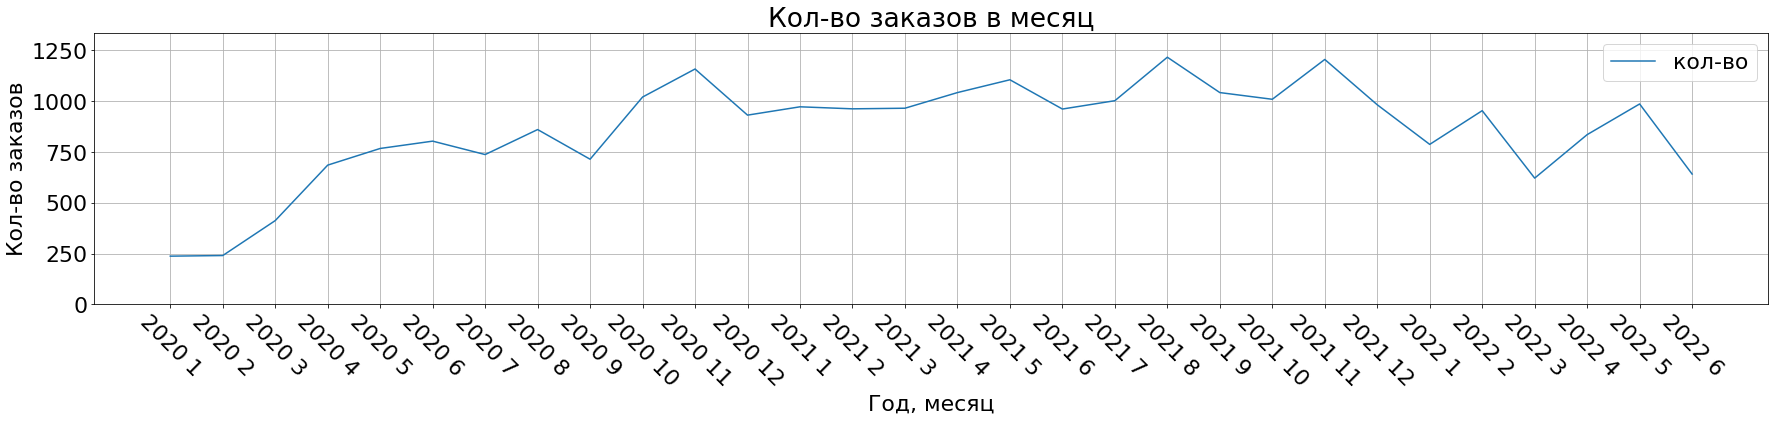

In [33]:
    plt.rcParams.update({'font.size': 22})
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_median_count.date_m, group_median_count.order_count, label=f'кол-во')
    plt.xticks(rotation=-45) 
    plt.ylim(0, group_median_count.order_count.max()*1.1)
    plt.xlabel('Год, месяц')
    plt.ylabel('Кол-во заказов')
    plt.title(f'Кол-во заказов в месяц')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Кол-во заказов в месяц общее.pdf', dpi=200, bbox_inches='tight')

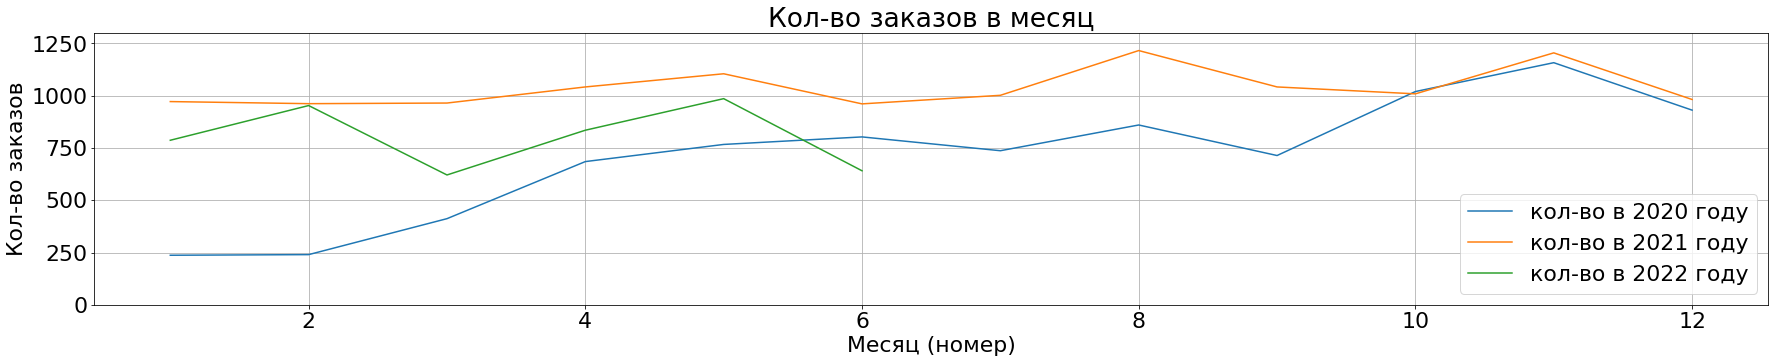

In [34]:
for year in group_median_count.year.unique():
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_median_count.query(f'year == {year}').month, group_median_count.query(f'year == {year}').order_count, label=f'кол-во в {year} году')
    plt.xticks(rotation=0) 
    plt.ylim(0, 1300)
    plt.xlabel('Месяц (номер)')
    plt.ylabel('Кол-во заказов')
    plt.title(f'Кол-во заказов в месяц')
    plt.legend()
    plt.grid(True)
plt.savefig(f'Кол-во заказов в месяц по годам 2020-2022.pdf', dpi=200, bbox_inches='tight')
    

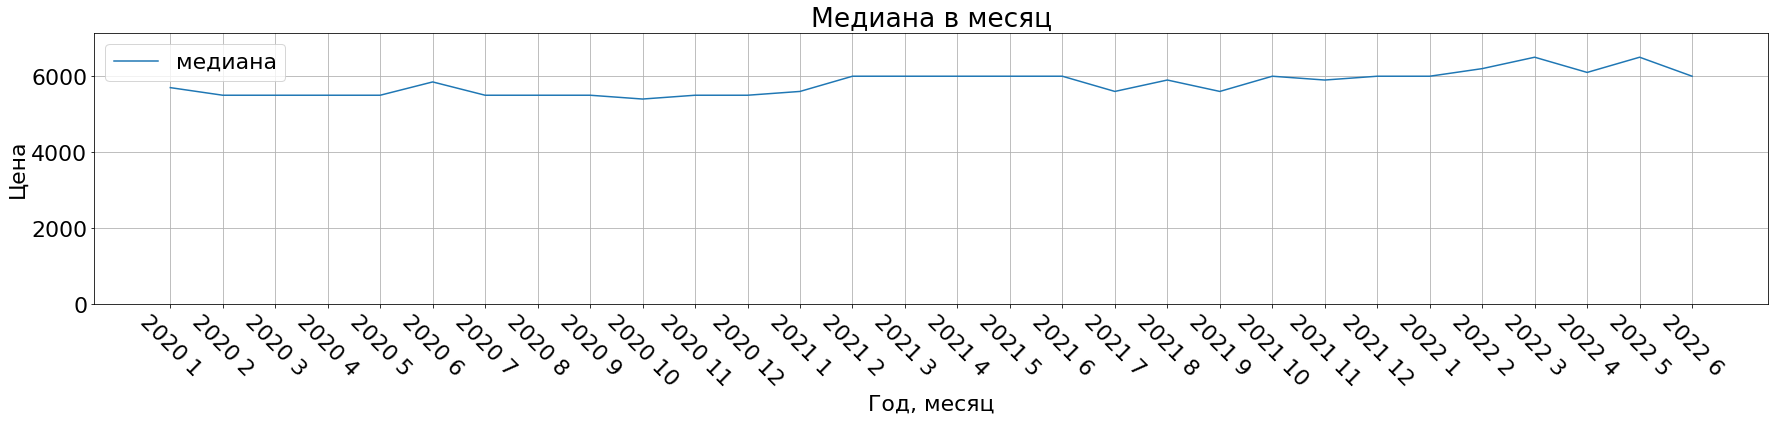

In [35]:
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_median_count.date_m, group_median_count.median_price, label=f'медиана')
    plt.ylim(0, group_median_count.median_price.max()*1.1)
    plt.xticks(rotation=-45) 
    plt.xlabel('Год, месяц')
    plt.ylabel('Цена')
    plt.title(f'Медиана в месяц')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Медиана цены в месяц.pdf', dpi=200, bbox_inches='tight')

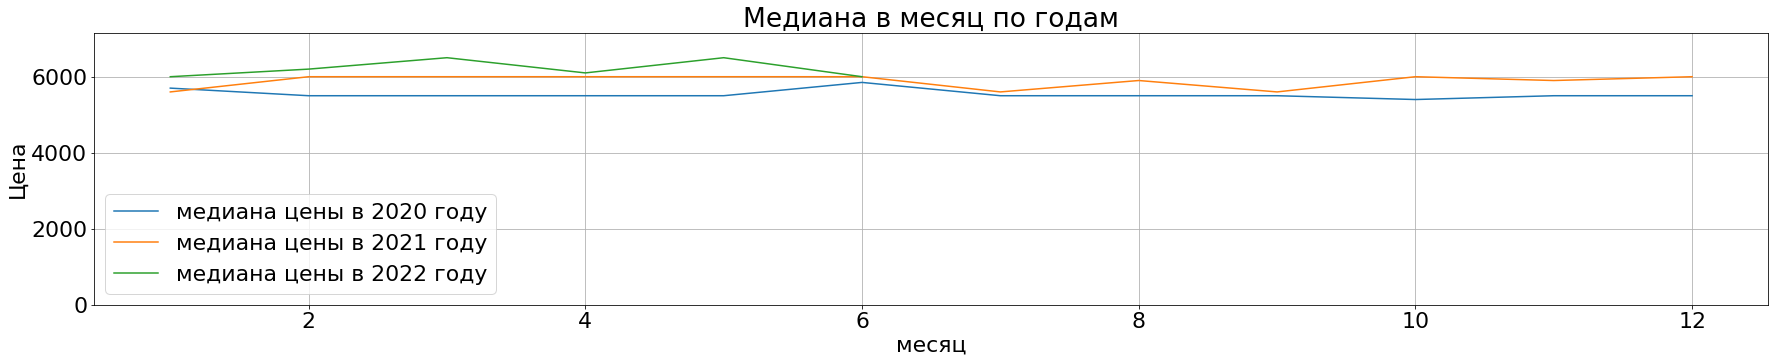

In [36]:
for year in group_median_count.year.unique():
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_median_count.query(f'year == {year}').month, group_median_count.query(f'year == {year}').median_price, label=f'медиана цены в {year} году')
    plt.ylim(0, group_median_count.query(f'year == {year}').median_price.max()*1.1)
    plt.xticks(rotation=0) 
    plt.xlabel('месяц')
    plt.ylabel('Цена')
    plt.title(f'Медиана в месяц по годам')
    plt.legend()
    plt.grid(True)
plt.savefig(f'Медиана цены в месяц по годам 2020-2022.pdf', dpi=200, bbox_inches='tight')

### **Вывод**
* Кол-во заказов постепенно повышается с января по октябрь 2020 с уровня 250 до 1.000
* С октября 2020 по декабрь 2021 кол-во заказов в месяк колеблется в пределах 1.000 - 1.250
* С января 2022 кол-во снижается и колеблется в пределах порядка 650 - 1.000
* Медианная цена стабильная в течение всего отчетного периода и находится в пределах 5.500 - 6.500р., имея тенденцию к небольшому повышению в концу отчетного периода



## Кол-во заказов в день и день недели 

### Медиана кол-ва заказов в день по месяцам

In [37]:
df_report_moment['date'] = df_report_moment.delivery_date.dt.date
df_report_moment['date'] = df_report_moment['date'].astype(str)
df_report_moment['week_day'] = df_report_moment['date'].astype(str)
# qunatity of orders per day

qood_median = df_report_moment.query('date < "2022-06-27"', engine='python')\
    .groupby(['date', 'month', 'year'], as_index=False).address.count()\
    .rename(columns={'address':'number_orders_day'})\
    .sort_values('date')\
    .groupby(['year', 'month'], as_index=False).number_orders_day.median()
qood_median.year = qood_median.year.astype(int)
qood_median.month = qood_median.month.astype(int)

qood_median['date'] = qood_median.year.astype(str) + ' ' + qood_median.month.astype(str)

qood_median.head()

,year,month,number_orders_day,date
0,2020,1,27.0,2020 1
1,2020,2,24.0,2020 2
2,2020,3,16.0,2020 3
3,2020,4,26.0,2020 4
4,2020,5,28.0,2020 5


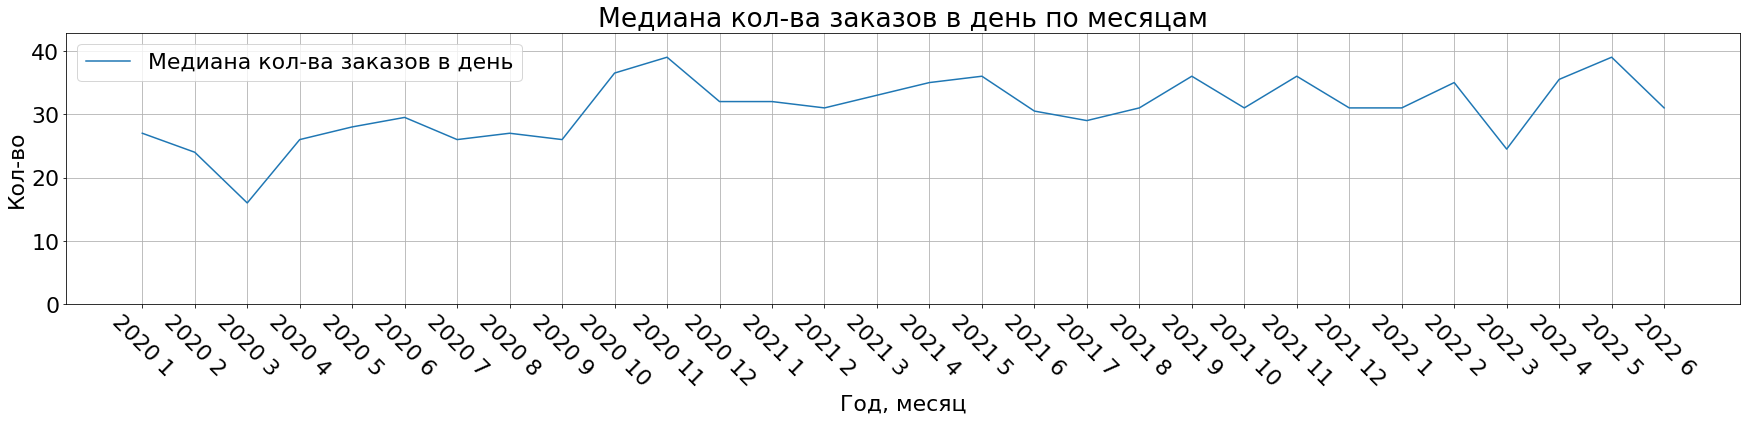

In [38]:
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(qood_median.date, qood_median.number_orders_day, label=f'Медиана кол-ва заказов в день')
    plt.xticks(rotation=-45) 
    plt.ylim(0, qood_median.number_orders_day.max()*1.1)
    plt.xlabel('Год, месяц')
    plt.ylabel('Кол-во')
    plt.title(f'Медиана кол-ва заказов в день по месяцам')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Медиана кол-ва заказов в день по месяцам.pdf', dpi=200, bbox_inches='tight')

#### **Вывод**
* Медианное кол-во заказов колеблется с октября 2020 в районе 30 - 40 в день со снижением в марте 2022 до 35

### Максимальное кол-ва заказов в день по месяцам

In [39]:
qood_max = df_report_moment.query('date < "2022-06-27"', engine='python')\
    .groupby(['date', 'month', 'year'], as_index=False).address.count()\
    .rename(columns={'address':'number_orders_day'})\
    .sort_values('date')\
    .groupby(['year', 'month'], as_index=False).number_orders_day.max()
qood_max['date'] = qood_max.year.astype(str) + ' ' + qood_max.month.astype(str)

qood_max.head()

,year,month,number_orders_day,date
0,2020.0,1.0,38,2020.0 1.0
1,2020.0,2.0,50,2020.0 2.0
2,2020.0,3.0,44,2020.0 3.0
3,2020.0,4.0,44,2020.0 4.0
4,2020.0,5.0,49,2020.0 5.0


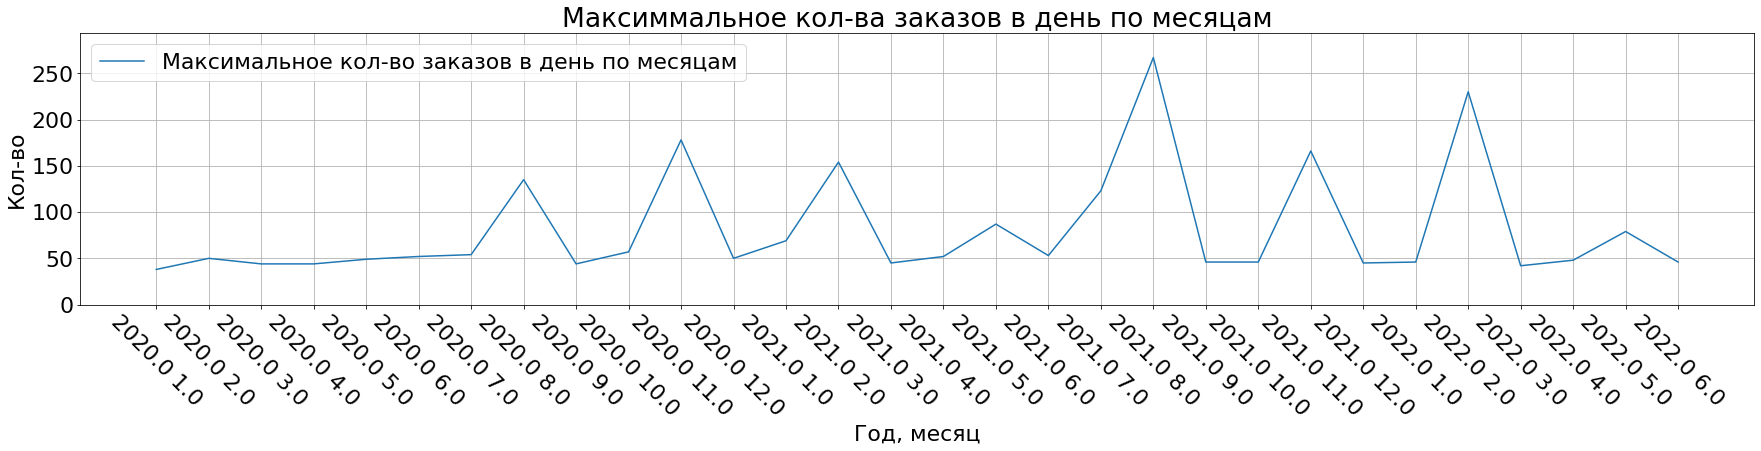

In [40]:
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(qood_max.date, qood_max.number_orders_day, label=f'Максимальное кол-во заказов в день по месяцам')
    plt.xticks(rotation=-45) 
    plt.ylim(0, qood_max.number_orders_day.max()*1.1)
    plt.xlabel('Год, месяц')
    plt.ylabel('Кол-во')
    plt.title(f'Максиммальное кол-ва заказов в день по месяцам')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Максимальное кол-во заказов в день по месяцам.pdf', dpi=200, bbox_inches='tight')

In [41]:
# number of orders by day
noobd = df_report_moment.query('date < "2022-06-27"', engine='python')\
    .groupby('date', as_index=False).date_and_time.count()\
    .rename(columns={'date_and_time':'noobd'})\
    .sort_values('date')

noobd['weekday'] =  pd.to_datetime(noobd.date, format='%Y-%m-%dT%H:%M:%S').dt.weekday
noobd['month'] = pd.to_datetime(noobd.date, format='%Y-%m-%dT%H:%M:%S').dt.month
noobd['year'] = pd.to_datetime(noobd.date, format='%Y-%m-%dT%H:%M:%S').dt.year
noobd['day'] =  pd.to_datetime(noobd.date, format='%Y-%m-%dT%H:%M:%S').dt.day
noobd

,date,noobd,weekday,month,year,day
0,2020-01-03,13,4,1,2020,3
1,2020-01-04,2,5,1,2020,4
2,2020-01-05,11,6,1,2020,5
3,2020-01-06,25,0,1,2020,6
4,2020-01-07,20,1,1,2020,7
...,...,...,...,...,...,...
797,2022-06-22,31,2,6,2022,22
798,2022-06-23,30,3,6,2022,23
799,2022-06-24,43,4,6,2022,24
800,2022-06-25,29,5,6,2022,25


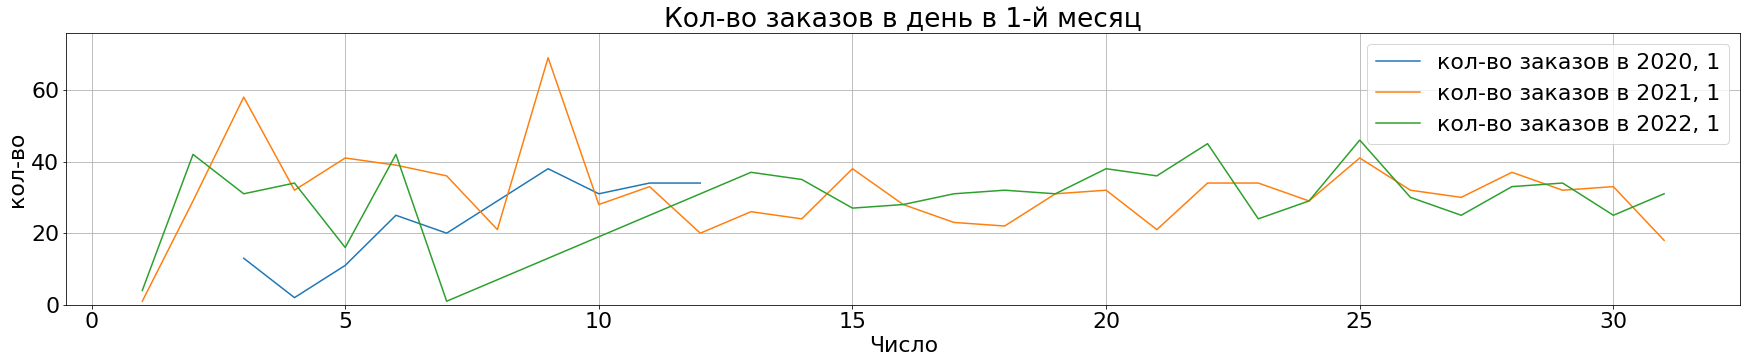

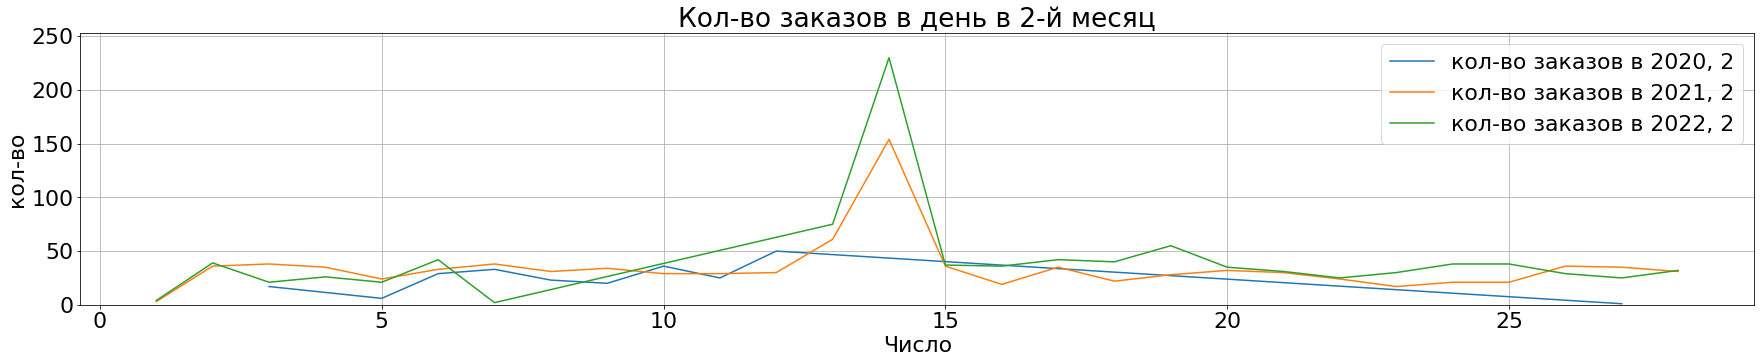

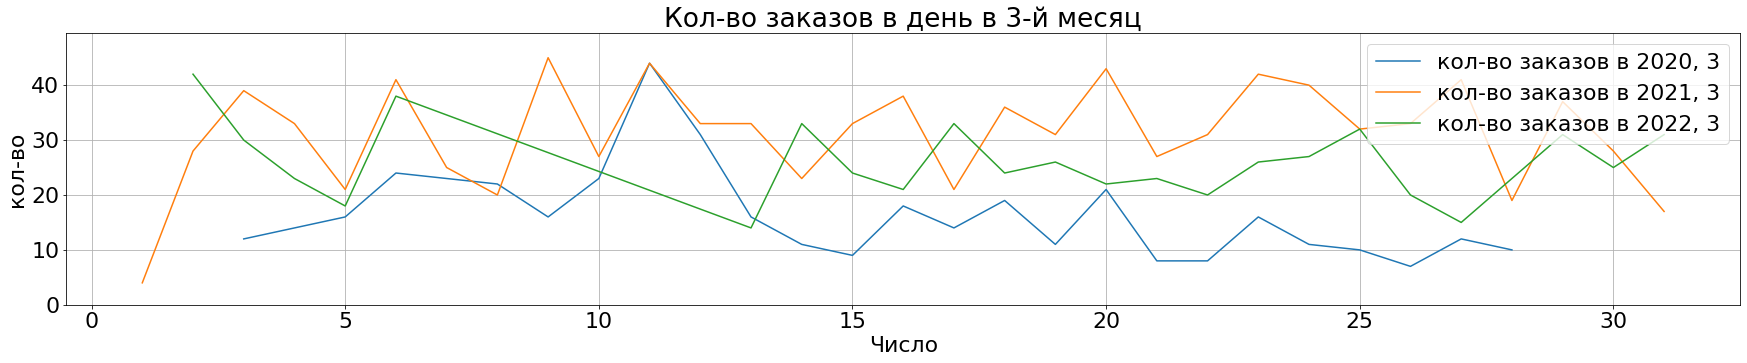

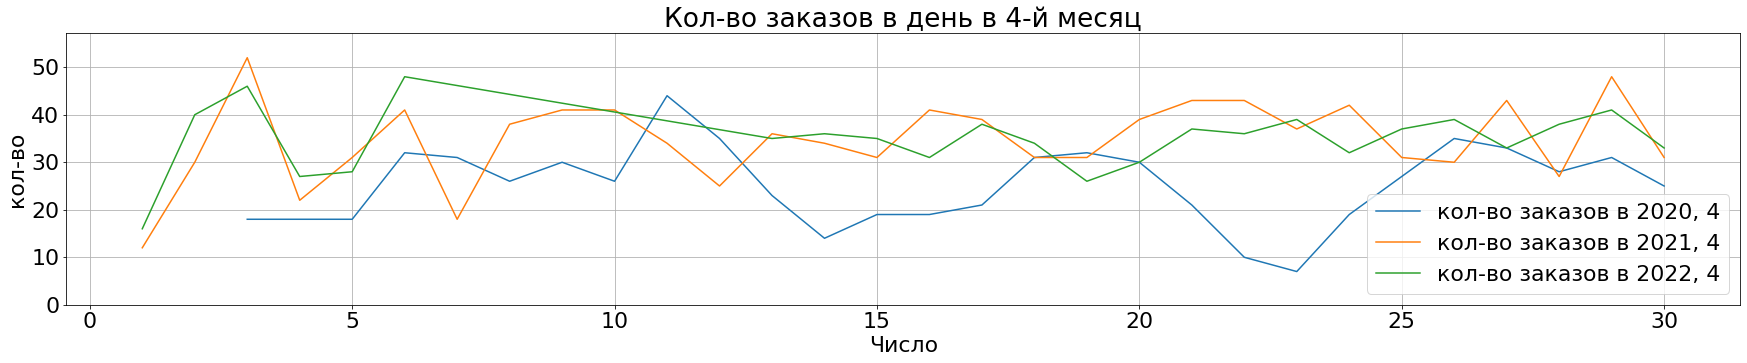

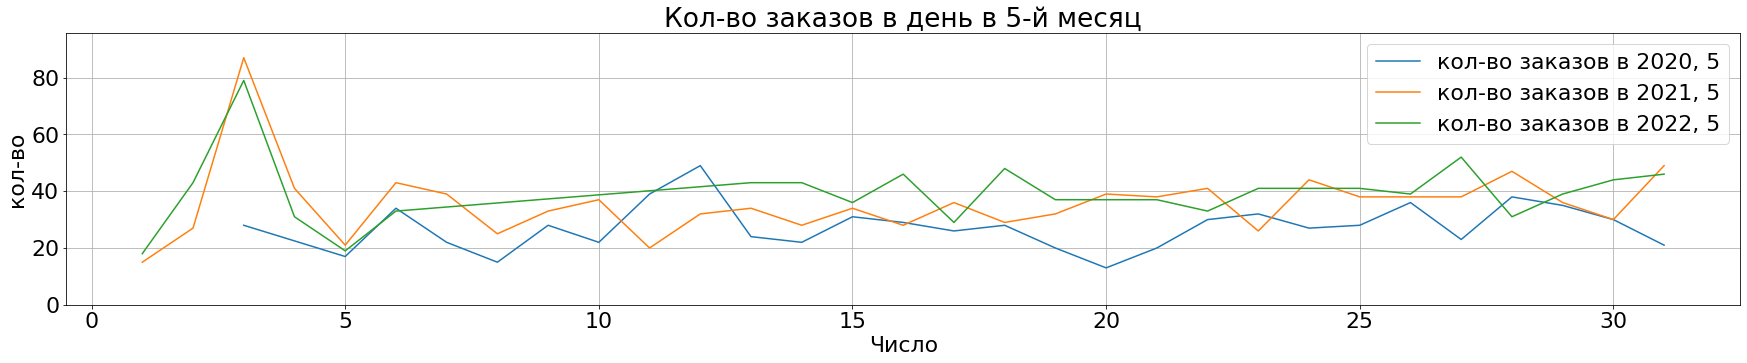

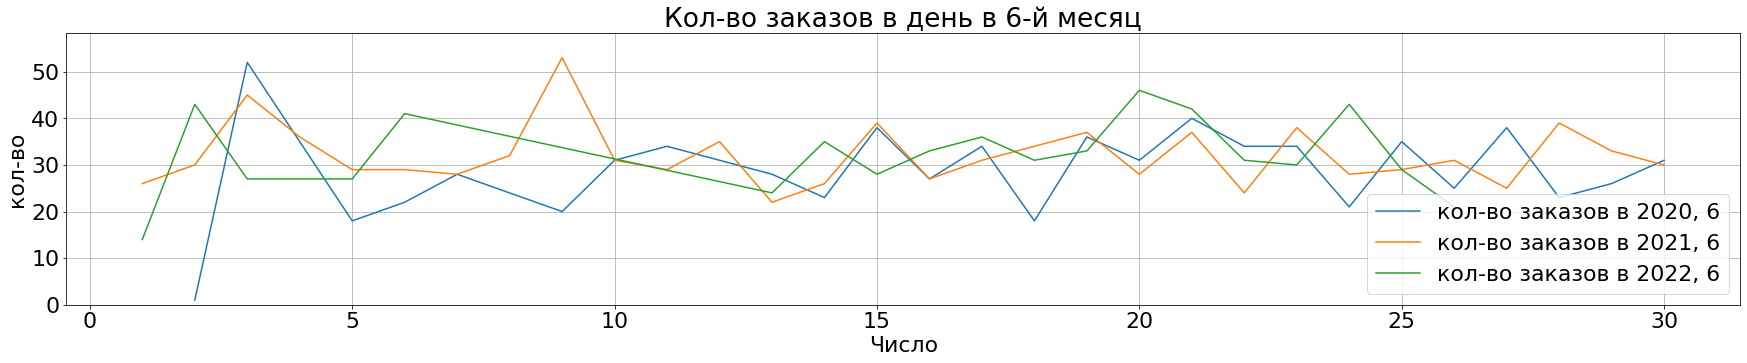

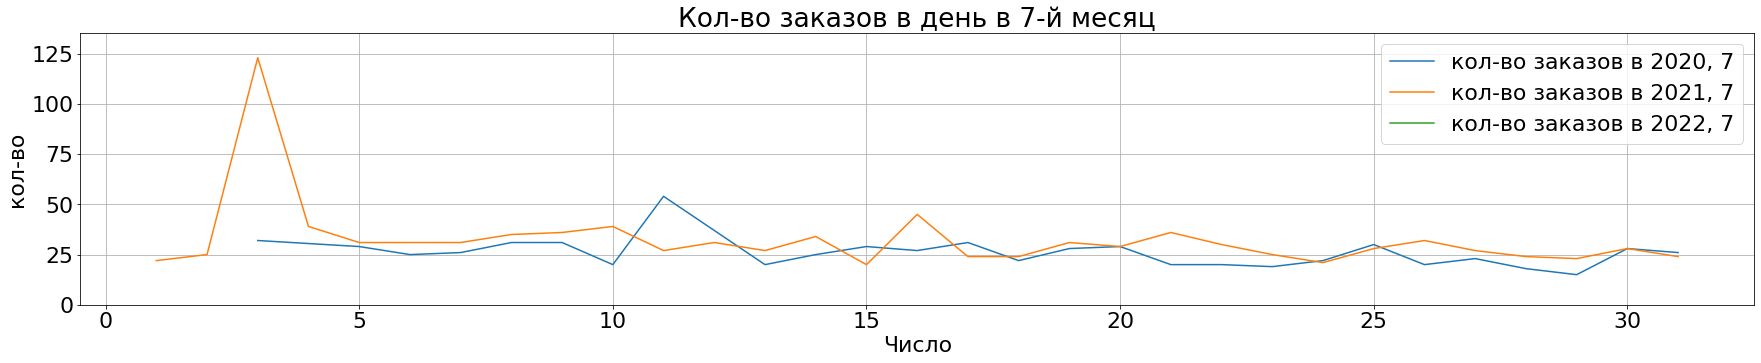

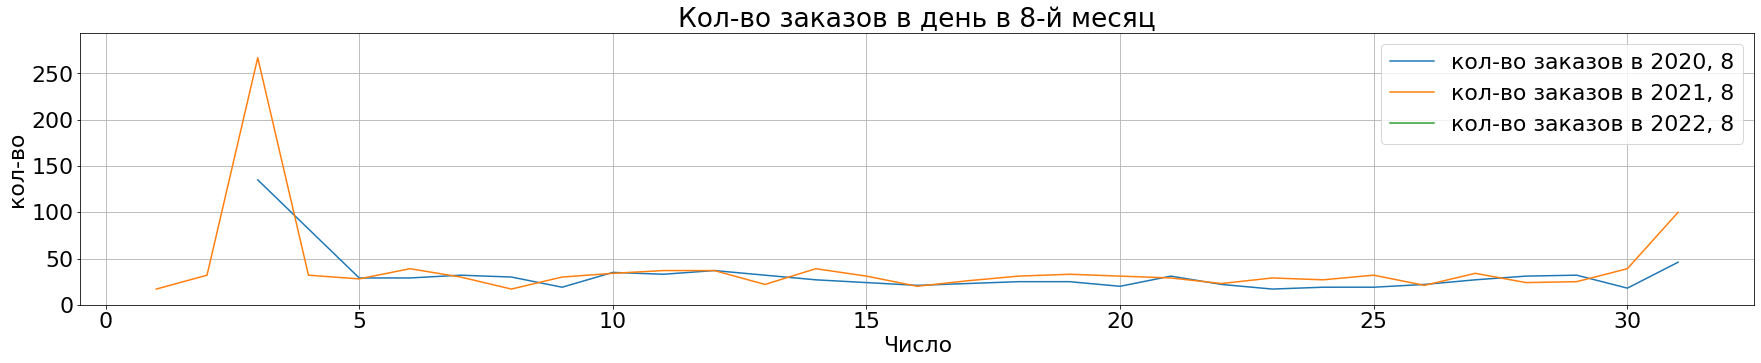

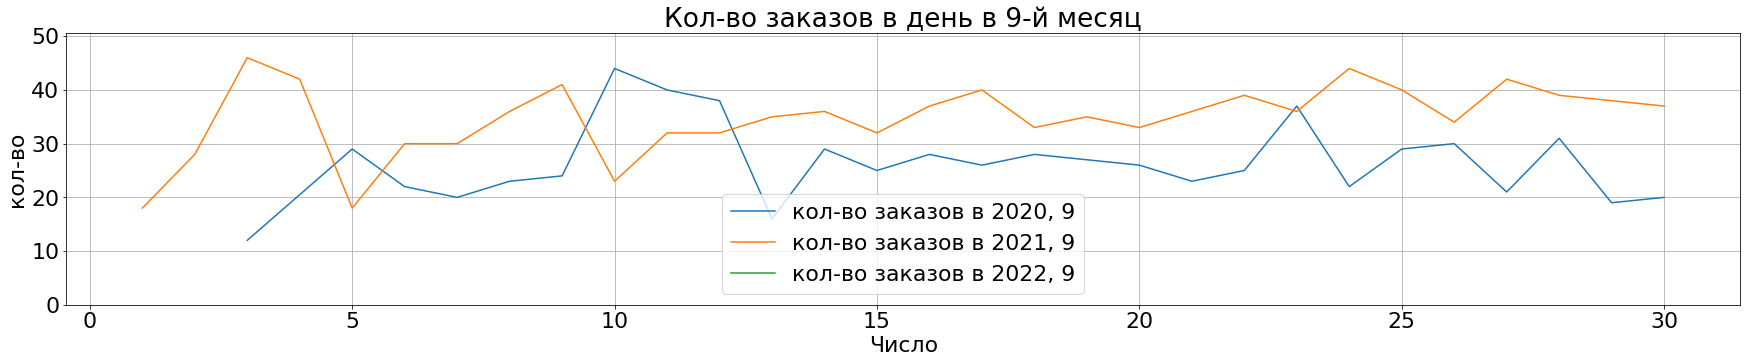

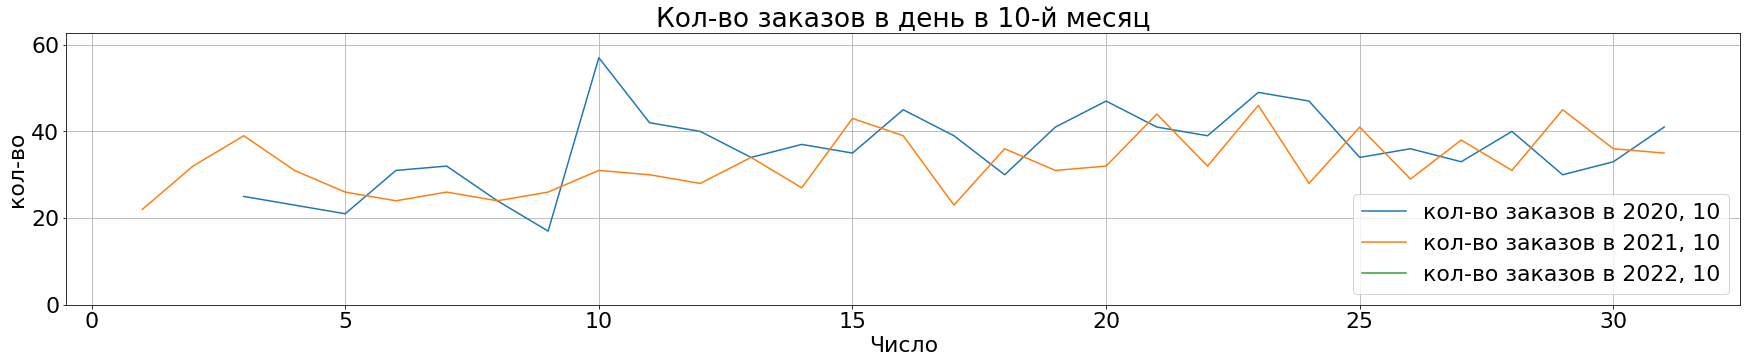

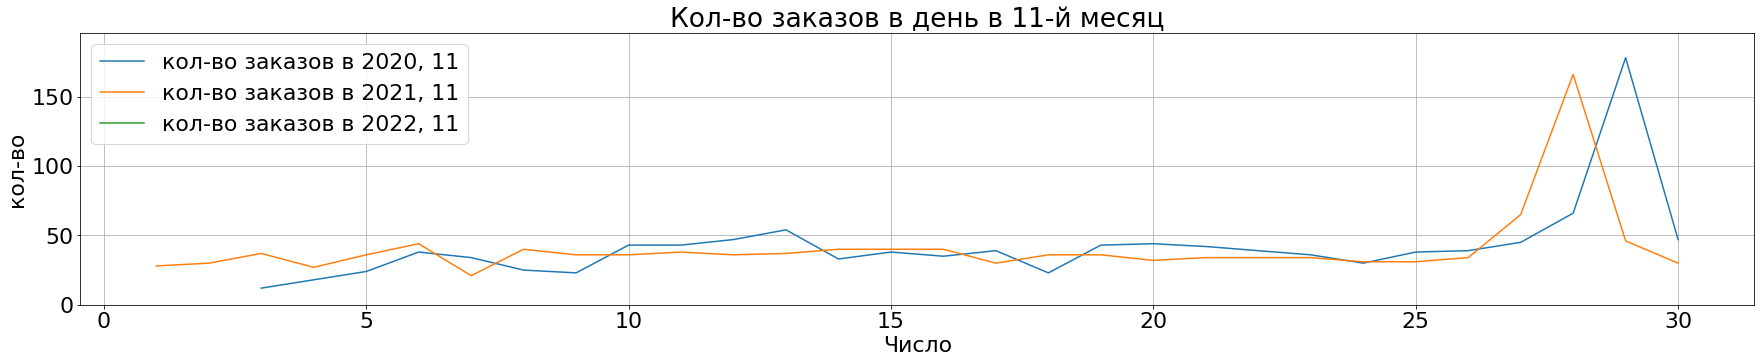

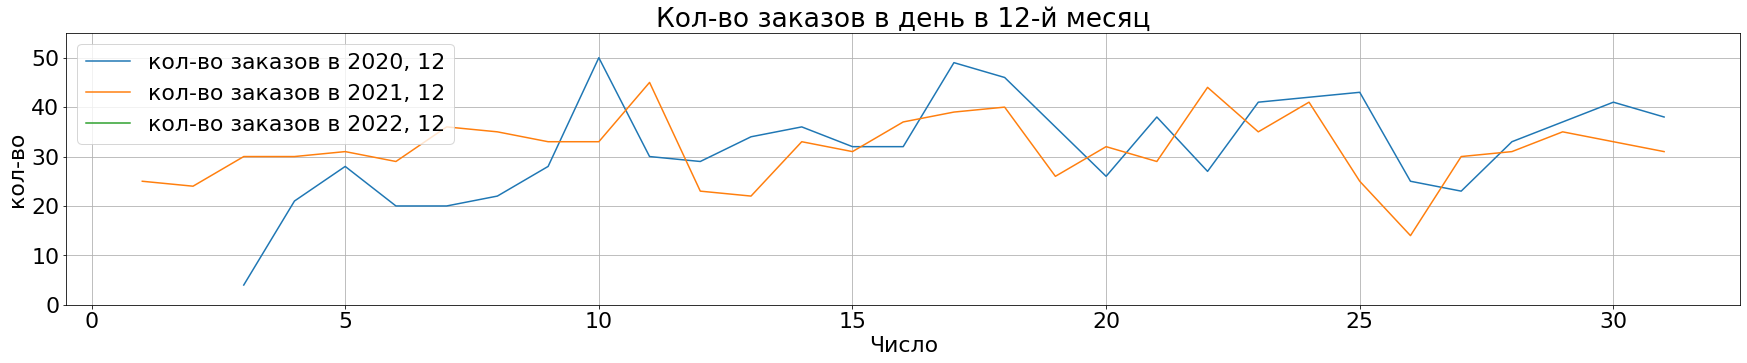

In [42]:
for month_ in noobd.month.unique():
    m = []
    for year_ in noobd.year.unique():
        m.append(noobd.query(f'month == {month_} & year == {year_}').noobd.max())
        
        plt.rcParams["figure.figsize"] = (30, 5)
        plt.plot(noobd.query(f'month == {month_} & year == {year_}').day, noobd.query(f'month == {month_} & year == {year_}').noobd, label=f'кол-во заказов в {year_}, {month_}')
        plt.xticks(rotation=0) 
        plt.ylim(0, 280)
        plt.xlabel('Число')
        plt.ylabel('кол-во')
        plt.title(f'Кол-во заказов в день в {month_}-й месяц')
        plt.legend()
        plt.grid(True)
        
    plt.ylim(0, max(m)*1.1)
    
    plt.show()
# plt.savefig(f'Кол-во заказов в день по месяцам.pdf', dpi=200, bbox_inches='tight')

#### **Вывод**
* Максимальное кол-во заказов в день отмечается в августе, ноябре, феврале каждого года
* Пик - порядка 250

### Кол-во заказов по дням недели за весь период

In [43]:
noobd.groupby('weekday', as_index=False).noobd.mean()

,weekday,noobd
0,0,33.973913
1,1,32.776786
2,2,30.911504
3,3,30.791304
4,4,31.606838
5,5,34.008772
6,6,31.577586


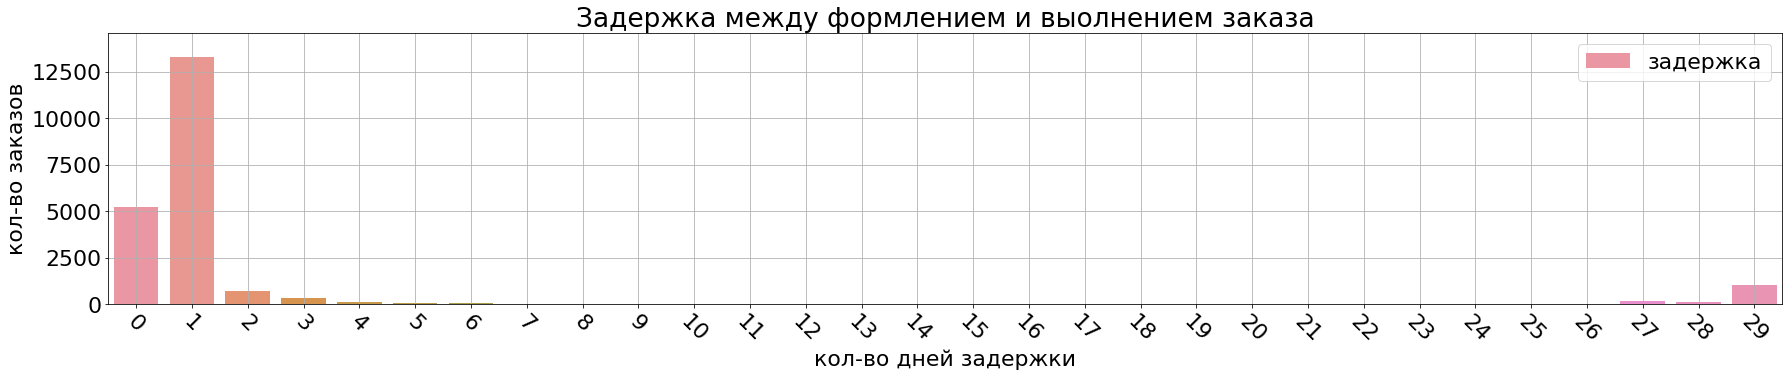

In [44]:
df_delay = df_report_moment.query('date < "2022-06-27"', engine='python')
df_delay['delay'] = (df_delay.delivery_date - df_delay.date_and_time)
df_delay['delay_days'] = df_delay.delay.dt.days
df_delay.delay_days = df_delay.delay_days.abs()
df_delgraph = df_delay.groupby('delay_days', as_index=False).delay.count().rename(columns={'delay':'orders_count'})

# delay graph clreared
df_dgc = df_delgraph.query(f'delay_days < {df_delgraph.delay_days.quantile(0.95)}').sort_values('delay_days')
df_dgc

plt.rcParams["figure.figsize"] = (30, 5)
sns.barplot(df_dgc.query('delay_days < 30').delay_days, df_dgc.query('delay_days < 30').orders_count, label=f'задержка')
plt.xticks(rotation=-45) 
plt.ylim(0, df_dgc.query('delay_days < 30').orders_count.max()*1.1)
plt.xlabel('кол-во дней задержки')
plt.ylabel('кол-во заказов')
plt.title(f'Задержка между формлением и выолнением заказа')
plt.legend()
plt.grid(True)
#     plt.savefig(f'Выручка в месяц общая.pdf', dpi=200, bbox_inches='tight')

In [45]:
df_delgraph['share'] = (df_delgraph.orders_count / df_delgraph.orders_count.sum()).map(lambda x: '{:.2%}'.format(x))
df_delgraph['share_abs'] = (df_delgraph.orders_count / df_delgraph.orders_count.sum()).round(3)
df_delgraph_20 = df_delgraph.sort_values('share_abs', ascending=False).head(20)
df_delgraph_20.share_abs.sum()

0.927

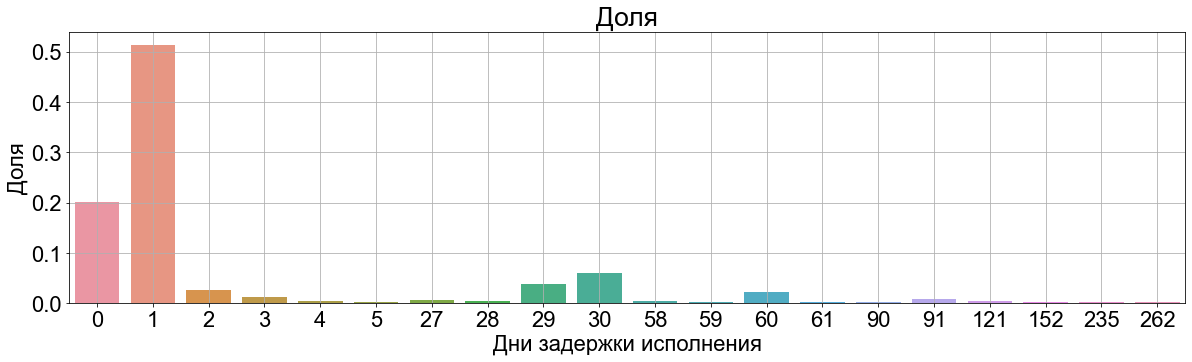

In [46]:
fig, ax = plt.subplots()
ax = sns.barplot(x='delay_days', y='share_abs',   data=df_delgraph_20) # orient = 'h'
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Доля')
ax.set_xlabel('Дни задержки исполнения')
ax.set_ylabel('Доля') 
# ax.legend(chains.object_type)
# sns.set_style("dark")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig.set_figheight(5)  # высота
fig.set_figwidth(20)  # ширина
plt.grid(True)

In [47]:
df_delgraph.query('delay_days < 15').orders_count.sum() / df_delgraph.orders_count.sum()

0.7681624758220503

#### **Вывод**
* Кол-во заказов по дням недели в среднем отличается мало и находится в пределах 30.9 - 34.0
* 20% заказов требуют исполнения в день приёма
* 50% - на следующий день

## Выручка в месяц

In [48]:
group_value_count = df_report_moment.groupby(['year','month'], as_index=False)\
    .agg({'price':'sum'})\
    .rename(columns={'price':'value'})
group_value_count[['year', 'month']] = group_value_count[['year', 'month']].astype(int)
group_value_count['date_m'] = group_value_count.year.astype(str) + ' ' + group_median_count.month.astype(str)
group_value_count.head()

,year,month,value,date_m
0,2020,1,1546940,2020 1
1,2020,2,1550890,2020 2
2,2020,3,2582005,2020 3
3,2020,4,4467516,2020 4
4,2020,5,5002932,2020 5


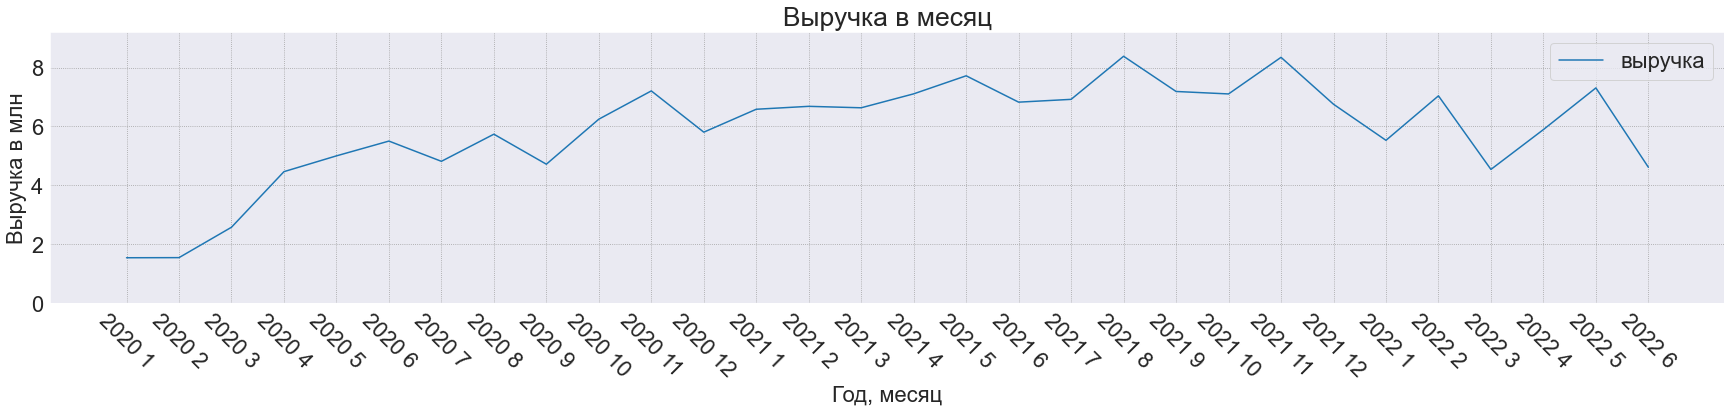

In [49]:
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_value_count.date_m, group_value_count.value / 10**6, label=f'выручка')
    plt.xticks(rotation=-45) 
    plt.ylim(0, group_value_count.value.max()*1.1 / 10**6)
    plt.xlabel('Год, месяц')
    plt.ylabel('Выручка в млн')
    plt.title(f'Выручка в месяц')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Выручка в месяц общая.pdf', dpi=200, bbox_inches='tight')

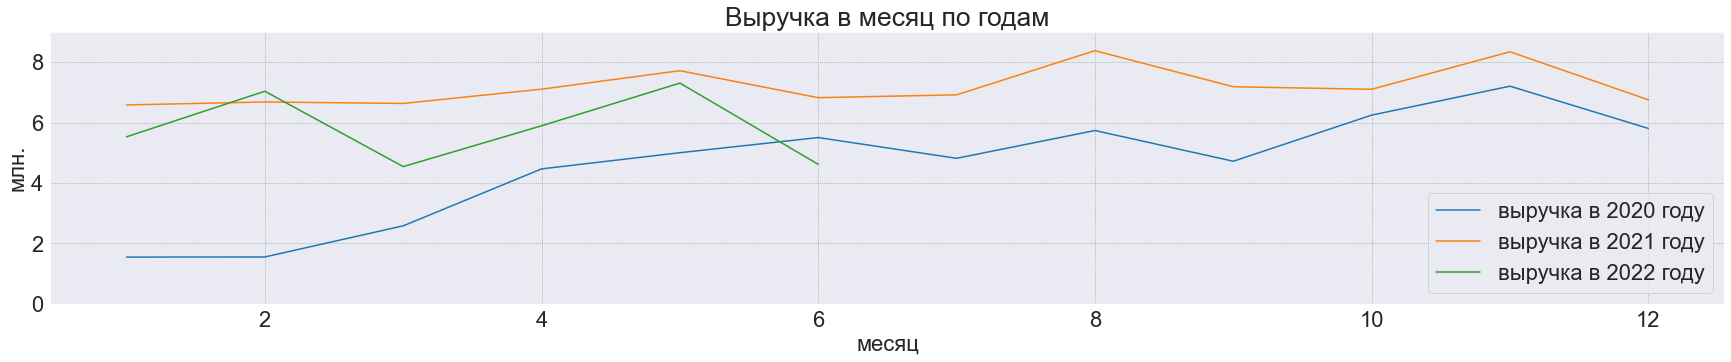

In [50]:
for year in group_value_count.year.unique():
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(group_value_count.query(f'year == {year}').month, group_value_count.query(f'year == {year}').value / 10**6, label=f'выручка в {year} году')
    plt.ylim(0, 9)
    plt.xticks(rotation=0) 
    plt.xlabel('месяц')
    plt.ylabel('млн.')
    plt.title(f'Выручка в месяц по годам')
    plt.legend()
    plt.grid(True)
plt.savefig(f'Выручка в месяц по годам 2020-2022.pdf', dpi=200, bbox_inches='tight')

### **Вывод**
* Выручка максимальна в 2021 году и достигает более 8млн.р./мес
* В 2022 году нестабильна с марта по июнь в пределах 5млн.р./мес - 8млн.р./мес

## Постоянные клиенты

In [51]:
df_report_moment.head()

,Unnamed: 0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year,metro,date,week_day
0,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8.0,2020.0,бибирево,2020-08-03,2020-08-03
1,3,самовывоз,наталья партнёрство,889989498,10000,2020-03-21,в 14:00,654c,NaN,NaN,2020-03-21 11:55:00,букет розово малиновый,NaN,3.0,2020.0,None,2020-03-21,2020-03-21
2,4,"224622, москва город, г. москва, ул. трехгорны...",анаид клиент т,585557777,5400,2020-03-26,в 10:00,681c,оплачен полностью,NaN,2020-03-24 11:34:00,"букет на 5000 одноголовая роза россия,эустома,...",оплата по счету,3.0,2020.0,None,2020-03-26,2020-03-26
3,5,"москва город, г. москва, ул. адмирала макарова...",роман клиент т,568569755,6000,2020-03-25,с 13:00 до 14:00,696c,оплачен полностью,NaN,2020-03-25 10:40:00,коробка барбадос гортензии и эустома,перевод на карту тинькофф,3.0,2020.0,None,2020-03-25,2020-03-25
4,6,"московская область, с. ангелово, жилой комплек...",зина клиент т,988799558,9000,2020-03-25,с 12:00 до 20:00,697c,оплачен полностью,NaN,2020-03-25 10:42:00,коробка на усмотрение на 8000,оплата по счету,3.0,2020.0,None,2020-03-25,2020-03-25


In [52]:
pay_dict = {'сче':'счет', 'тиньк':'тинькофф', "сбер":'сбербанк', "наличн":'наличные'}

In [53]:
df_report_moment.payment_type = df_report_moment.payment_type.str.lower()
df_report_moment.payment_type.value_counts()\
    .to_frame()\
    .reset_index()\
    .rename(columns={'payment_type':'quantity', 'index':'pay_type'})

,pay_type,quantity
0,оплата по счету,9634
1,перевод на карту сбербанк,7896
2,банковская карта (тинькофф),4036
3,перевод на карту тинькофф,2469
4,наличные,147
5,оплата по счету; оплата по счету,29
6,перевод на карту сбербанк; перевод на карту сб...,28
7,оплата по счету; перевод на карту сбербанк,15
8,банковская карта (тинькофф); банковская карта ...,7
9,банковская карта (тинькофф); перевод на карту ...,7


In [54]:
pay_dict = {'сче':'счет', 'тиньк':'тинькофф', "сбер":'сбербанк', "наличн":'наличные'}

for key, value in pay_dict.items():
    df_report_moment.loc[(df_report_moment.payment_type.str.contains(key)) &
                         (df_report_moment.payment_type.notna()), 'payment_method'] = value

In [55]:
df_report_moment.payment_method.unique()

array([nan, 'счет', 'тинькофф', 'сбербанк', 'наличные'], dtype=object)

In [56]:
df_pm = df_report_moment.payment_method.value_counts()\
    .reset_index()\
    .rename(columns={'payment_method':'quantity', 'index':'payment_methon'})
df_pm['share'] = (df_pm.quantity / df_pm.quantity.sum()).map(lambda x: "{:.2%}".format(x))
df_pm.sort_values('quantity')
df_pm

,payment_methon,quantity,share
0,счет,9663,39.76%
1,сбербанк,7955,32.73%
2,тинькофф,6528,26.86%
3,наличные,156,0.64%


In [57]:
df_report_moment.payment_method.notna().mean()*100


94.01160541586073

In [58]:
dup = df_report_moment.query(f'phone.isin({df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()})',engine='python')
dup[['month', 'year']] = dup[['month', 'year']].astype(int)
dup.head(2)

,Unnamed: 0,address,client_name,phone,price,delivery_date,delivery_time,code,payment_status,email,date_and_time,client_comment,payment_type,month,year,metro,date,week_day,payment_method
0,1,"москва город, г. москва, ул. римского-корсаков...",кирилл клиент т,574488594,4100,2020-08-03,с 08:00 до 10:00,347c,NaN,NaN,2020-05-03 19:11:00,50 белых тюльпан,NaN,8,2020,бибирево,2020-08-03,2020-08-03,NaN
1,3,самовывоз,наталья партнёрство,889989498,10000,2020-03-21,в 14:00,654c,NaN,NaN,2020-03-21 11:55:00,букет розово малиновый,NaN,3,2020,None,2020-03-21,2020-03-21,NaN


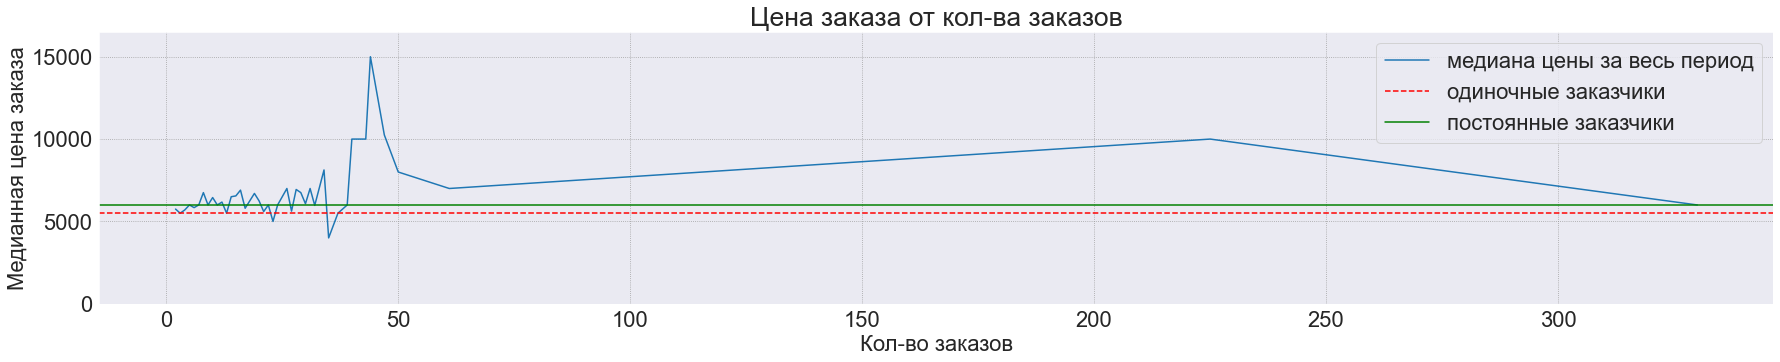

In [59]:
med_price_ord_quant = dup.groupby('phone', as_index=False)\
    .agg({'phone':'count', 'price':'median', 'client_name':'min'})\
    .rename(columns={'price':'sum_price','phone':'order_count'})\
    .groupby('order_count', as_index=False).agg({'sum_price':'median','client_name':'min'})\
    .rename(columns={'sum_price':'median_price'})
med_price_ord_quant

plt.plot(med_price_ord_quant.order_count, med_price_ord_quant.median_price, label=f'медиана цены за весь период')
plt.ylim(0, med_price_ord_quant.median_price.max()*1.1)
plt.axhline(y=df_report_moment.query(f'~phone.isin({df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()})',engine='python').price.median(), color='r', linestyle='--', label='одиночные заказчики')
plt.axhline(y=df_report_moment.query(f'phone.isin({df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()})',engine='python').price.median(), color='g', linestyle='-', label='постоянные заказчики')
plt.xticks(rotation=0) 
plt.xlabel('Кол-во заказов')
plt.ylabel('Медианная цена заказа')
plt.title(f'Цена заказа от кол-ва заказов')
plt.legend()
plt.grid(True)
plt.savefig(f'Цена заказа от кол-ва заказов 2020-2022.pdf', dpi=200, bbox_inches='tight')

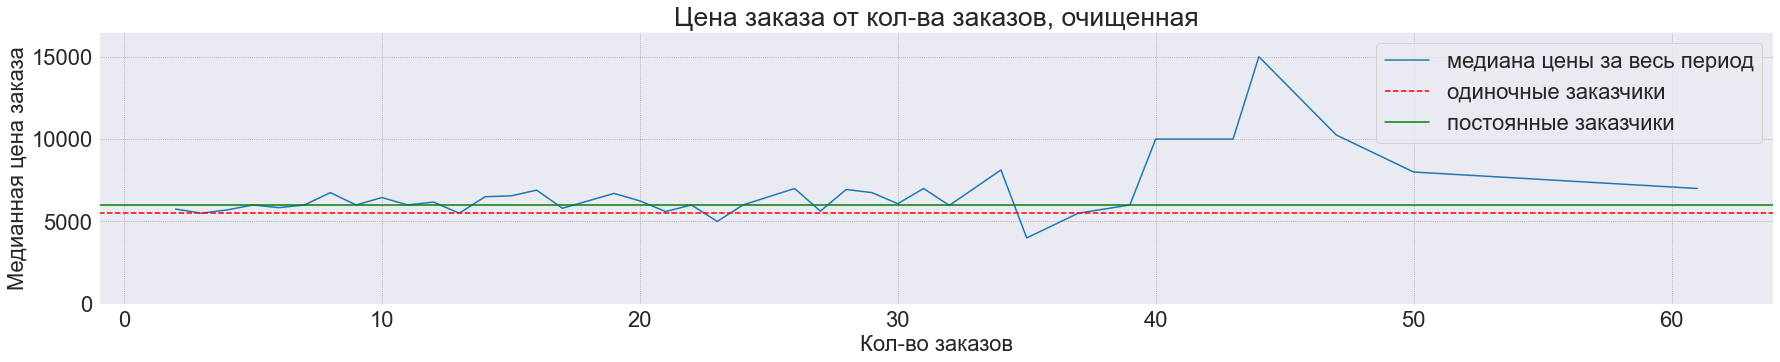

In [60]:
plt.rcParams.update({'font.size': 22})
plt.plot(med_price_ord_quant[0:41].order_count, med_price_ord_quant[0:41].median_price, label=f'медиана цены за весь период')
plt.ylim(0, med_price_ord_quant.median_price.max()*1.1)
plt.axhline(y=df_report_moment.query(f'~phone.isin({df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()})',engine='python').price.median(), color='r', linestyle='--', label='одиночные заказчики')
plt.axhline(y=df_report_moment.query(f'phone.isin({df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()})',engine='python').price.median(), color='g', linestyle='-', label='постоянные заказчики')
plt.xticks(rotation=0) 
plt.xlabel('Кол-во заказов')
plt.ylabel('Медианная цена заказа')
plt.title(f'Цена заказа от кол-ва заказов, очищенная')
plt.legend()
plt.grid(True)
plt.savefig(f'Цена заказа от кол-ва заказов 2020-2022, очищенная.pdf', dpi=200, bbox_inches='tight')

In [61]:
med_price_ord_quant.sort_values('order_count', ascending=False)[0:5]

,order_count,median_price,client_name
42,330,6000.0,+6285892415701
41,225,10000.0,барадвкова
40,61,7000.0,резеда
39,50,8000.0,виктория клиент т
38,47,10250.0,olya_iv клиент т


In [62]:
rep_buyers = df_report_moment.phone[df_report_moment.phone.duplicated()].tolist()
df_report_moment[['month', 'year']] = df_report_moment[['month', 'year']].astype(int)

In [63]:
# unique orders quantity
uoq = df_report_moment.groupby(['year', 'month'], as_index=False)\
    .agg({'phone':'nunique','price':'sum','price':'count'})\
    .rename(columns={'phone':'uniques', 'price':'orderd_quantity'})
uoq['share'] = ((uoq.orderd_quantity - uoq.uniques) / uoq.orderd_quantity).round(3)
uoq['share_perc'] = uoq.share.map(lambda x: '{:.1%}'.format(x))
uoq['date_m'] = uoq.year.astype(str) + ' ' + uoq.month.astype(str)

uoq.head()

,year,month,uniques,orderd_quantity,share,share_perc,date_m
0,2020,1,227,237,0.042,4.2%,2020 1
1,2020,2,224,240,0.067,6.7%,2020 2
2,2020,3,371,412,0.100,10.0%,2020 3
3,2020,4,612,685,0.107,10.7%,2020 4
4,2020,5,671,767,0.125,12.5%,2020 5


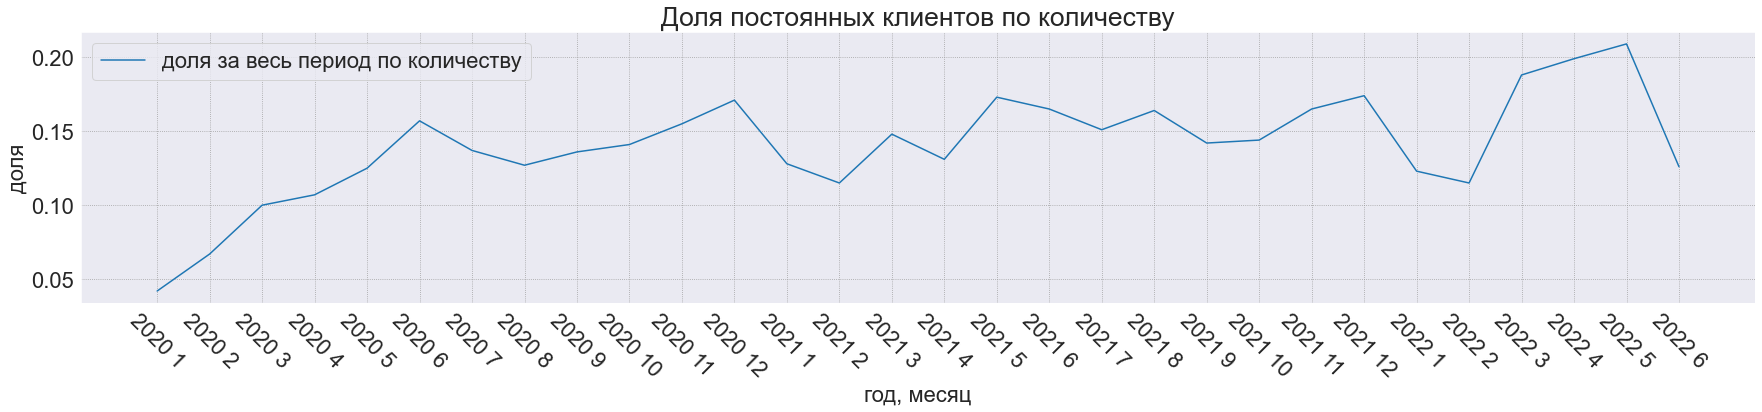

In [64]:
plt.rcParams.update({'font.size': 22})
plt.plot(uoq.date_m, uoq.share, label=f'доля за весь период по количеству')
plt.xticks(rotation=-45) 
plt.xlabel('год, месяц')
plt.ylabel('доля')
plt.title(f'Доля постоянных клиентов по количеству')
plt.legend()
plt.grid(True)
plt.savefig(f'Доля постоянных клиентов по количеству 2020-2022, очищенная.pdf', dpi=200, bbox_inches='tight')

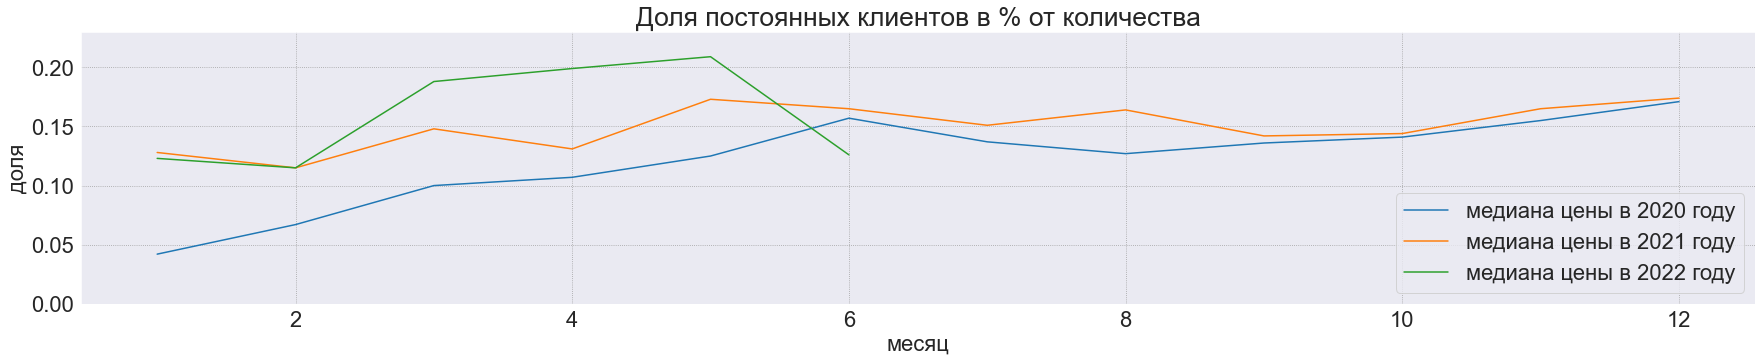

In [65]:
for year in uoq.year.unique():
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(uoq.query(f'year == {year}').month, uoq.query(f'year == {year}').share, label=f'медиана цены в {year} году')
    plt.ylim(0, uoq.query(f'year == {year}').share.max()*1.1)
    plt.xticks(rotation=0) 
    plt.xlabel('месяц')
    plt.ylabel('доля')
    plt.title(f'Доля постоянных клиентов в % от количества')
    plt.legend()
    plt.grid(True)
plt.savefig(f'Доля постоянных клиентов от количества по годам 2020-2022.pdf', dpi=200, bbox_inches='tight')

In [66]:
# unique orders quantity
df_report_moment['date_m'] = df_report_moment.year.astype(str) + ' ' + df_report_moment.month.astype(str)
uop = df_report_moment.groupby(['date_m', 'year', 'month', 'phone'], as_index=False)\
    .agg({'phone':'count', 'price':'sum'})\
    .rename(columns = {'phone':'order_quantity'})\
    .sort_values(['date_m', 'order_quantity', 'price'], ascending=False)

uop

,date_m,year,month,order_quantity,price
22040,2022 6,2022,6,16,96300
21925,2022 6,2022,6,6,37500
21819,2022 6,2022,6,4,34100
21984,2022 6,2022,6,4,18200
21979,2022 6,2022,6,3,27500
...,...,...,...,...,...
200,2020 1,2020,1,1,3500
226,2020 1,2020,1,1,3500
48,2020 1,2020,1,1,3400
76,2020 1,2020,1,1,3400


In [67]:
date = []
share = []
for unique_dt in uop.date_m.unique():
    total = uop.query(f'date_m == @unique_dt', engine='python').price.sum()
    rep_orders = uop.query(f'date_m == @unique_dt & order_quantity > 1', engine='python').price.sum()
    date.append(unique_dt)
    share.append(rep_orders / total)

In [68]:
date_s = pd.Series(date)
share_s = pd.Series(share)

In [69]:
rep_orders_share = share_s.to_frame().rename(columns={0:'share'})
rep_orders_share['date_m'] = date_s
rep_orders_share['year'] = rep_orders_share.date_m.str[0:4]
rep_orders_share['month'] = rep_orders_share.date_m.str[4::]
rep_orders_share.year = rep_orders_share.year.astype(int)
rep_orders_share.month = rep_orders_share.month.astype(int)
rep_orders_share = rep_orders_share.sort_values(['year', 'month'])
rep_orders_share.head()

,share,date_m,year,month
29,0.085200,2020 1,2020,1
25,0.120402,2020 2,2020,2
24,0.187432,2020 3,2020,3
23,0.192322,2020 4,2020,4
22,0.238406,2020 5,2020,5


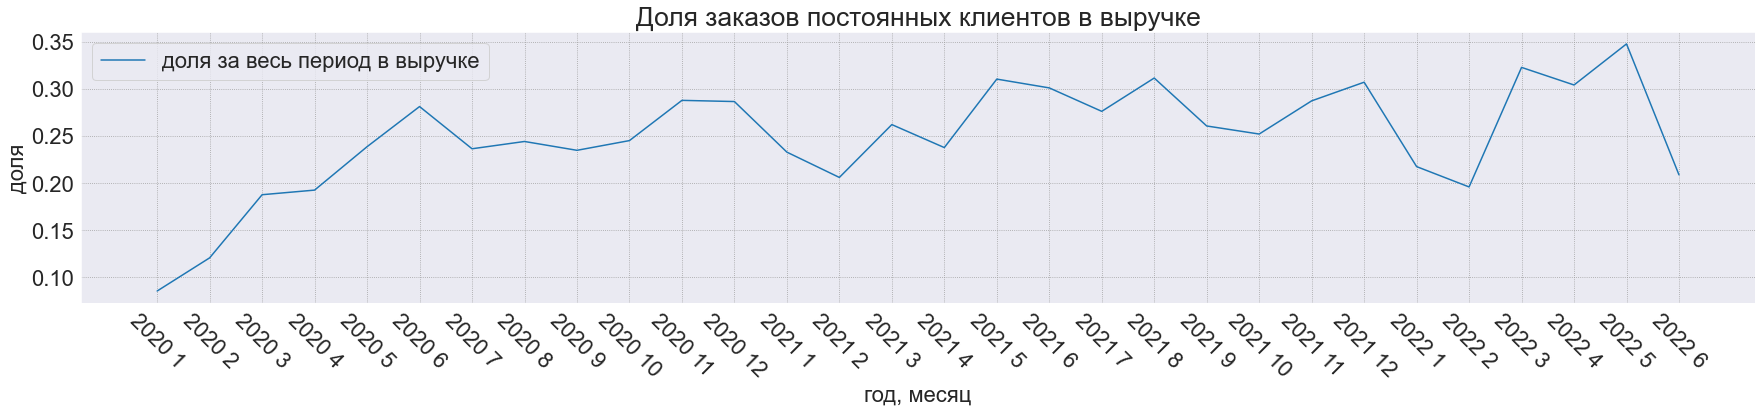

In [70]:
plt.rcParams.update({'font.size': 22})
plt.plot(rep_orders_share.date_m, rep_orders_share.share, label=f'доля за весь период в выручке')
plt.xticks(rotation=-45) 
plt.xlabel('год, месяц')
plt.ylabel('доля')
plt.title(f'Доля заказов постоянных клиентов в выручке')
plt.legend()
plt.grid(True)
plt.savefig(f'Доля постоянных клиентов в выручке 2020-2022, очищенная.pdf', dpi=200, bbox_inches='tight')

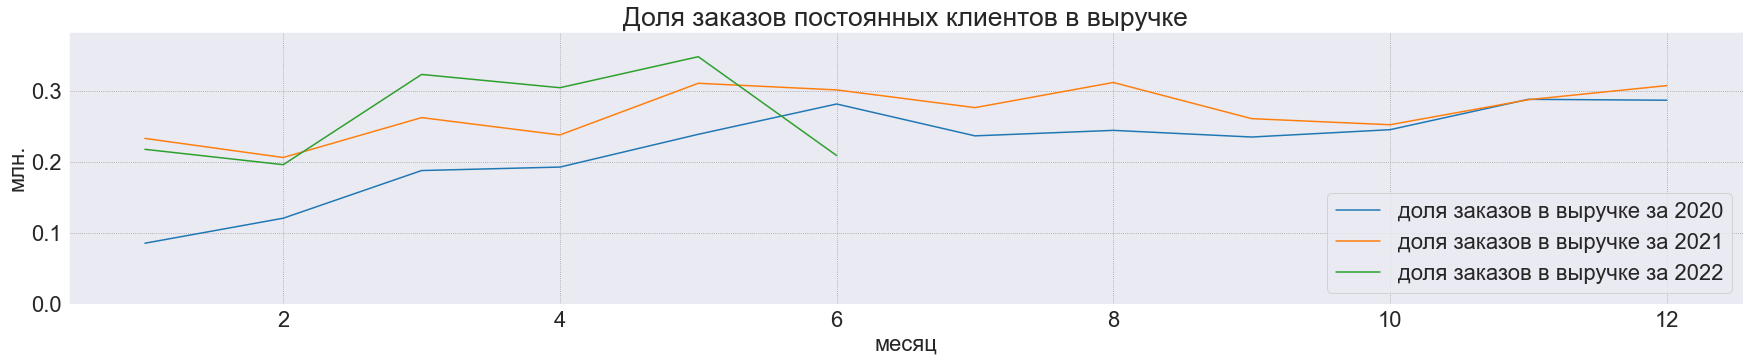

In [71]:
for year in rep_orders_share.year.unique():
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.plot(rep_orders_share.query(f'year == {year}').month, rep_orders_share.query(f'year == {year}').share, label=f'доля заказов в выручке за {year}')
    plt.ylim(0, rep_orders_share.query(f'year == {year}').share.max()*1.1)
    plt.xticks(rotation=0) 
    plt.xlabel('месяц')
    plt.ylabel('млн.')
    plt.title(f'Доля заказов постоянных клиентов в выручке')
    plt.legend()
    plt.grid(True)
plt.savefig(f'Доля постоянных клиентов в выручке годам 2020-2022.pdf', dpi=200, bbox_inches='tight')

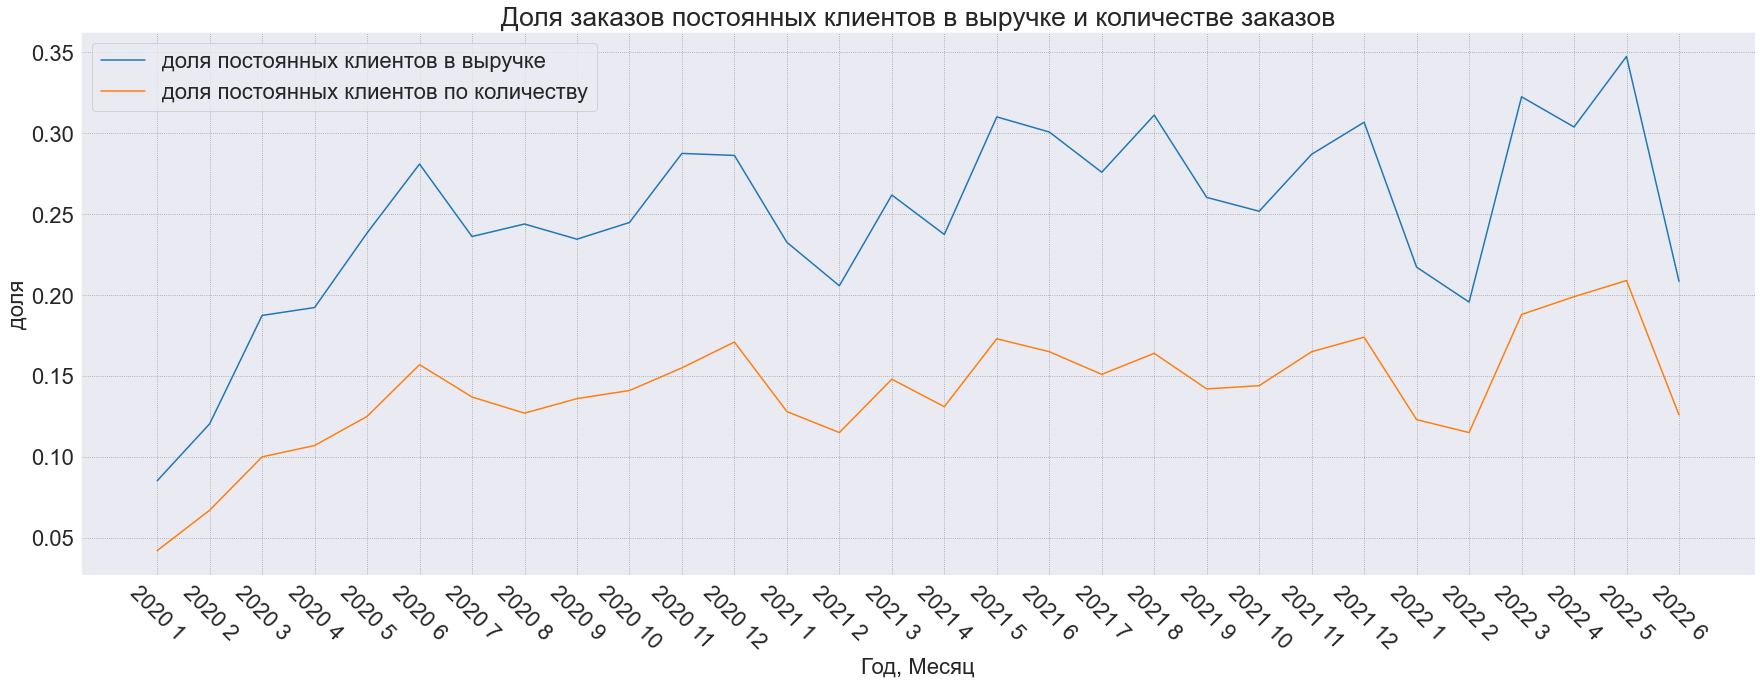

In [72]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(rep_orders_share.date_m, rep_orders_share.share, label=f'доля постоянных клиентов в выручке')
plt.plot(uoq.date_m, uoq.share, label=f'доля постоянных клиентов по количеству')

plt.xticks(rotation=-45) 
plt.xlabel('Год, Месяц')
plt.ylabel('доля')
plt.title(f'Доля заказов постоянных клиентов в выручке и количестве заказов')
plt.legend()
plt.grid(True)
plt.savefig(f'Общий, доля постоянных клиентов 2020-2022, очищенная.pdf', dpi=200, bbox_inches='tight')

In [73]:
share_compare = rep_orders_share.merge(uoq, on='date_m')
share_compare['vs'] = share_compare.share_x / share_compare.share_y
share_compare.head()

,share_x,date_m,year_x,month_x,year_y,month_y,uniques,orderd_quantity,share_y,share_perc,vs
0,0.085200,2020 1,2020,1,2020,1,227,237,0.042,4.2%,2.028582
1,0.120402,2020 2,2020,2,2020,2,224,240,0.067,6.7%,1.797042
2,0.187432,2020 3,2020,3,2020,3,371,412,0.100,10.0%,1.874319
3,0.192322,2020 4,2020,4,2020,4,612,685,0.107,10.7%,1.797398
4,0.238406,2020 5,2020,5,2020,5,671,767,0.125,12.5%,1.907250


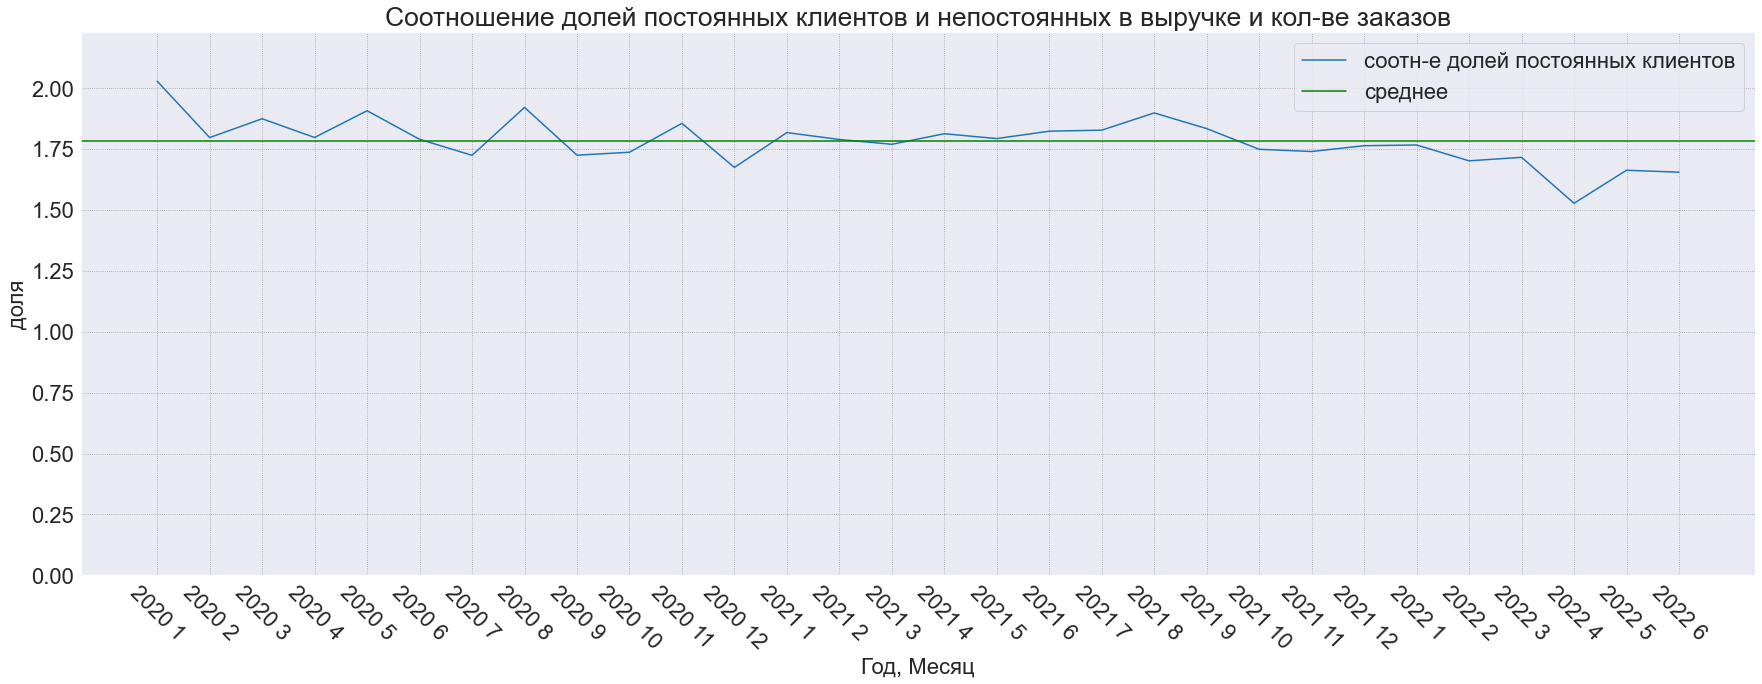

In [74]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(share_compare.date_m, share_compare.vs, label=f'соотн-е долей постоянных клиентов')

plt.axhline(y=share_compare.vs.mean(), color='g', linestyle='-', label='среднее')

plt.ylim(0, share_compare.vs.max()*1.1)
plt.xticks(rotation=-45) 
plt.xlabel('Год, Месяц')
plt.ylabel('доля')
plt.title(f'Соотношение долей постоянных клиентов и непостоянных в выручке и кол-ве заказов')
plt.legend()
plt.grid(True)
plt.savefig(f'Соотношение долей постоянных клиентов и непостоянных в выручке и кол-ве заказов.pdf', dpi=200, bbox_inches='tight')

### **Вывод**
* Предпочтительным для клиентов способом оплаты является безналичный расчет с долей 99,35% от всех операций оплаты
* Для клиентов с кол-вом заказов больше 40 за отчетный период медианная цена заказа превышает медианную
* Кол-во постоянных клиентов колеблется от 12% до 21%
* Доля выручки постояннх клиентов колеблется от 25% до 35%
* Вклад постоянных клиентов больше 1 на протяжении всего отчетного периода, однако имеет тенденцию к снижению с августа 2021 с уровня 1,9 до 1,6 в июне 2022

## **Общий вывод**


**Загрузка и предобработка**

* отчетный период - до 2022-06-27
* заменены названия столбцов
* дубликаты отсутствуют



**Распределение заказов по цене, гистограмма**

* Основная доля заказов сосредоточена в пределах 3.000-15.000р
* Также имеются редкие разовые заказы ценой 30.000 и более 
* Заказы ценой в 50.000 и более являются скорее сомнительными, что может быть проверено с помощью сверки фискальной отчетности



**Распределение заказов по станциям**


* ТОП-20 станций метро по кол-ву заказов: 
** 'профсоюзная',
** 'раменки',
** 'смоленская',
** 'цска',
** 'фрунзенская',
** 'юго-западная',
** 'арбатская',
** 'шелепиха',
** 'университет',
** 'маяковская',
** 'минская',
** 'сокол',
** 'академическая',
** 'киевская',
** 'крылатское',
** 'тверская',
** 'павелецкая',
** 'коломенская',
** 'тропарёво',
** 'бауманская' с максимумом **258** и минимумом **107** заказов


* ТОП-20 мединаны цены по станциям метро:
** 'покровское',
** 'стромынка',
** 'баковка',
** 'немчиновка',
** 'румянцево',
** 'воронцовская',
** 'красногорская',
** 'лобня',
** 'дорогомиловская',
** 'октябрьская',
** 'новаторская',
** 'кропоткинская',
** 'рубцовская',
** 'полежаевская',
** 'гражданская',
** 'нахабино',
** 'красногвардейская',
** 'третьяковская',
** 'сколково',
** 'щукинская'

с максимумом **12.500**р и минимумом **6.500**р

**Кол-во заказов, медиана цены в месяц***

* Кол-во заказов постепенно повышается с января по октябрь 2020 с уровня 250 до 1.000
* С октября 2020 по декабрь 2021 кол-во заказов в месяк колеблется в пределах 1.000 - 1.250
* С января 2022 кол-во снижается и колеблется в пределах порядка 650 - 1.000
* Медианная цена стабильная в течение всего отчетного периода и находится в пределах 5.500 - 6.500р., имея тенденцию к небольшому повышению к концу отчетного периода

**Медиана кол-ва заказов в день по месяцам**

* Медианное кол-во заказов колеблется с октября 2020 в районе 30 - 40 в день со снижением в марте 2022 до 35

**Максимальное кол-ва заказов в день по месяцам**

* Максимальное кол-во заказов в день отмечается в августе, ноябре, феврале каждого года
* Пик - порядка 250

**Кол-во заказов по дням недели за весь период**

* Кол-во заказов по дням недели в среднем отличается мало и находится в пределах 30.9 - 34.0
* 20% заказов требуют исполнения в день приёма
* 50% - на следующий день


**Выручка в месяц**

* Выручка максимальна в 2021 году и достигает более 8млн.р./мес
* В 2022 году нестабильна с марта по июнь в пределах 5млн.р./мес - 8млн.р./мес

**Постоянные клиенты**

* Предпочтительным для клиентов способом оплаты является безналичный расчет с долей 99,35% от всех операций оплаты
* Для клиентов с кол-вом заказов больше 40 за отчетный период медианная цена заказа превышает медианную
* Кол-во постоянных клиентов колеблется от 12% до 21%
* Доля выручки постояннх клиентов колеблется от 25% до 35%
* Вклад постоянных клиентов больше 1 на протяжении всего отчетного периода, однако имеет тенденцию к снижению с августа 2021 с уровня 1,9 до 1,6 в июне 2022






## **Рекомендации**

Отмечается стагнирование кол-ва заказов, а также дольного распределения постоянных и разовых клиентов. В связи с этим, если собственник бизнеса имеет потребность расширения бизнеса и/или улучшения общего уровня управления операционными процессами, можно рекомендовать следующее:
1. обратить внимание на клиентское обслуживание для сохранения и увеличения доли постоянных клиентов, так как они приносять стабильно большую вурычку, чем разовые. На постоянных клиентов также не приходятся маркетинговые издержки, поэтому коэффициент соотношения выручки будет выше в пользу постоянных клиентов;
2. возможно следует рассмотреть открытие дополнительной точки с меньшим объемом обработки заказов для опробирования другой модели бизнес-процессов, чтобы в случае успеха, перенести опыт на основную точку;
3. для высвобождения ресурса руководителя можно предложить выделение/найм отдельного менеджера
4. необходимо внедерение новой CRM (или корректировка используемой на данный момент) для:
    * четко однозначного соответствия заполняемой информации категориям полей при внесении инфо в CRM;
    * возможности получения текущей статистики в онлайн-режиме (или оперативном режиме без предварительной обработки, то есть готовой статистики здесь и сейчас) для своевременного реагирования и корректировки действий рабочей смены работников
    * повышения уровня вовлеченности работников, своевременного принятия решения о качестве работы персонала и доведения данной информации до работников
